# Synthetic Data for Machine Learning Classification Algorithms

# Orijinal Data

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("2024.csv")

# Remove 'Explained by: ' from column names
df.columns = df.columns.str.replace('Explained by: ', '', regex=False)

# Select relevant columns for analysis
factors = [
    'Ladder score',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
]

# Keep only the relevant columns
df_selected = df[factors + ['Country name']].copy()

# Standardize column names
df_selected.columns = [col.strip().replace(" ", "_").replace(":", "") for col in df_selected.columns]

# Create Happiness Level classes based on Ladder Score
df_selected['Happiness_Level'] = pd.cut(
    df_selected['Ladder_score'],
    bins=[0, 4.5, 6, 10],
    labels=['Low', 'Medium', 'High']
)

# Prepare features and target
X = df_selected.drop(columns=['Country_name', 'Ladder_score', 'Happiness_Level'])
y = df_selected['Happiness_Level']

# Fill missing values if any
X = X.fillna(X.mean(numeric_only=True))

# Preview the dataset
df_selected.head()


C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Ladder_score,Log_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Country_name,Happiness_Level
0,7.741,1.844,1.572,0.695,0.859,0.142,0.546,Finland,High
1,7.583,1.908,1.520,0.699,0.823,0.204,0.548,Denmark,High
2,7.525,1.881,1.617,0.718,0.819,0.258,0.182,Iceland,High
3,7.344,1.878,1.501,0.724,0.838,0.221,0.524,Sweden,High
4,7.341,1.803,1.513,0.740,0.641,0.153,0.193,Israel,High



=== Random Forest ===
Accuracy: 0.8276

Classification Report:
              precision    recall  f1-score   support

        High       0.92      1.00      0.96        11
         Low       1.00      0.33      0.50         6
      Medium       0.73      0.92      0.81        12

    accuracy                           0.83        29
   macro avg       0.88      0.75      0.76        29
weighted avg       0.86      0.83      0.80        29


=== Logistic Regression ===
Accuracy: 0.6897

Classification Report:
              precision    recall  f1-score   support

        High       0.83      0.91      0.87        11
         Low       0.50      0.33      0.40         6
      Medium       0.62      0.67      0.64        12

    accuracy                           0.69        29
   macro avg       0.65      0.64      0.64        29
weighted avg       0.67      0.69      0.68        29


=== Decision Tree ===
Accuracy: 0.6897

Classification Report:
              precision    recall  f1-sc

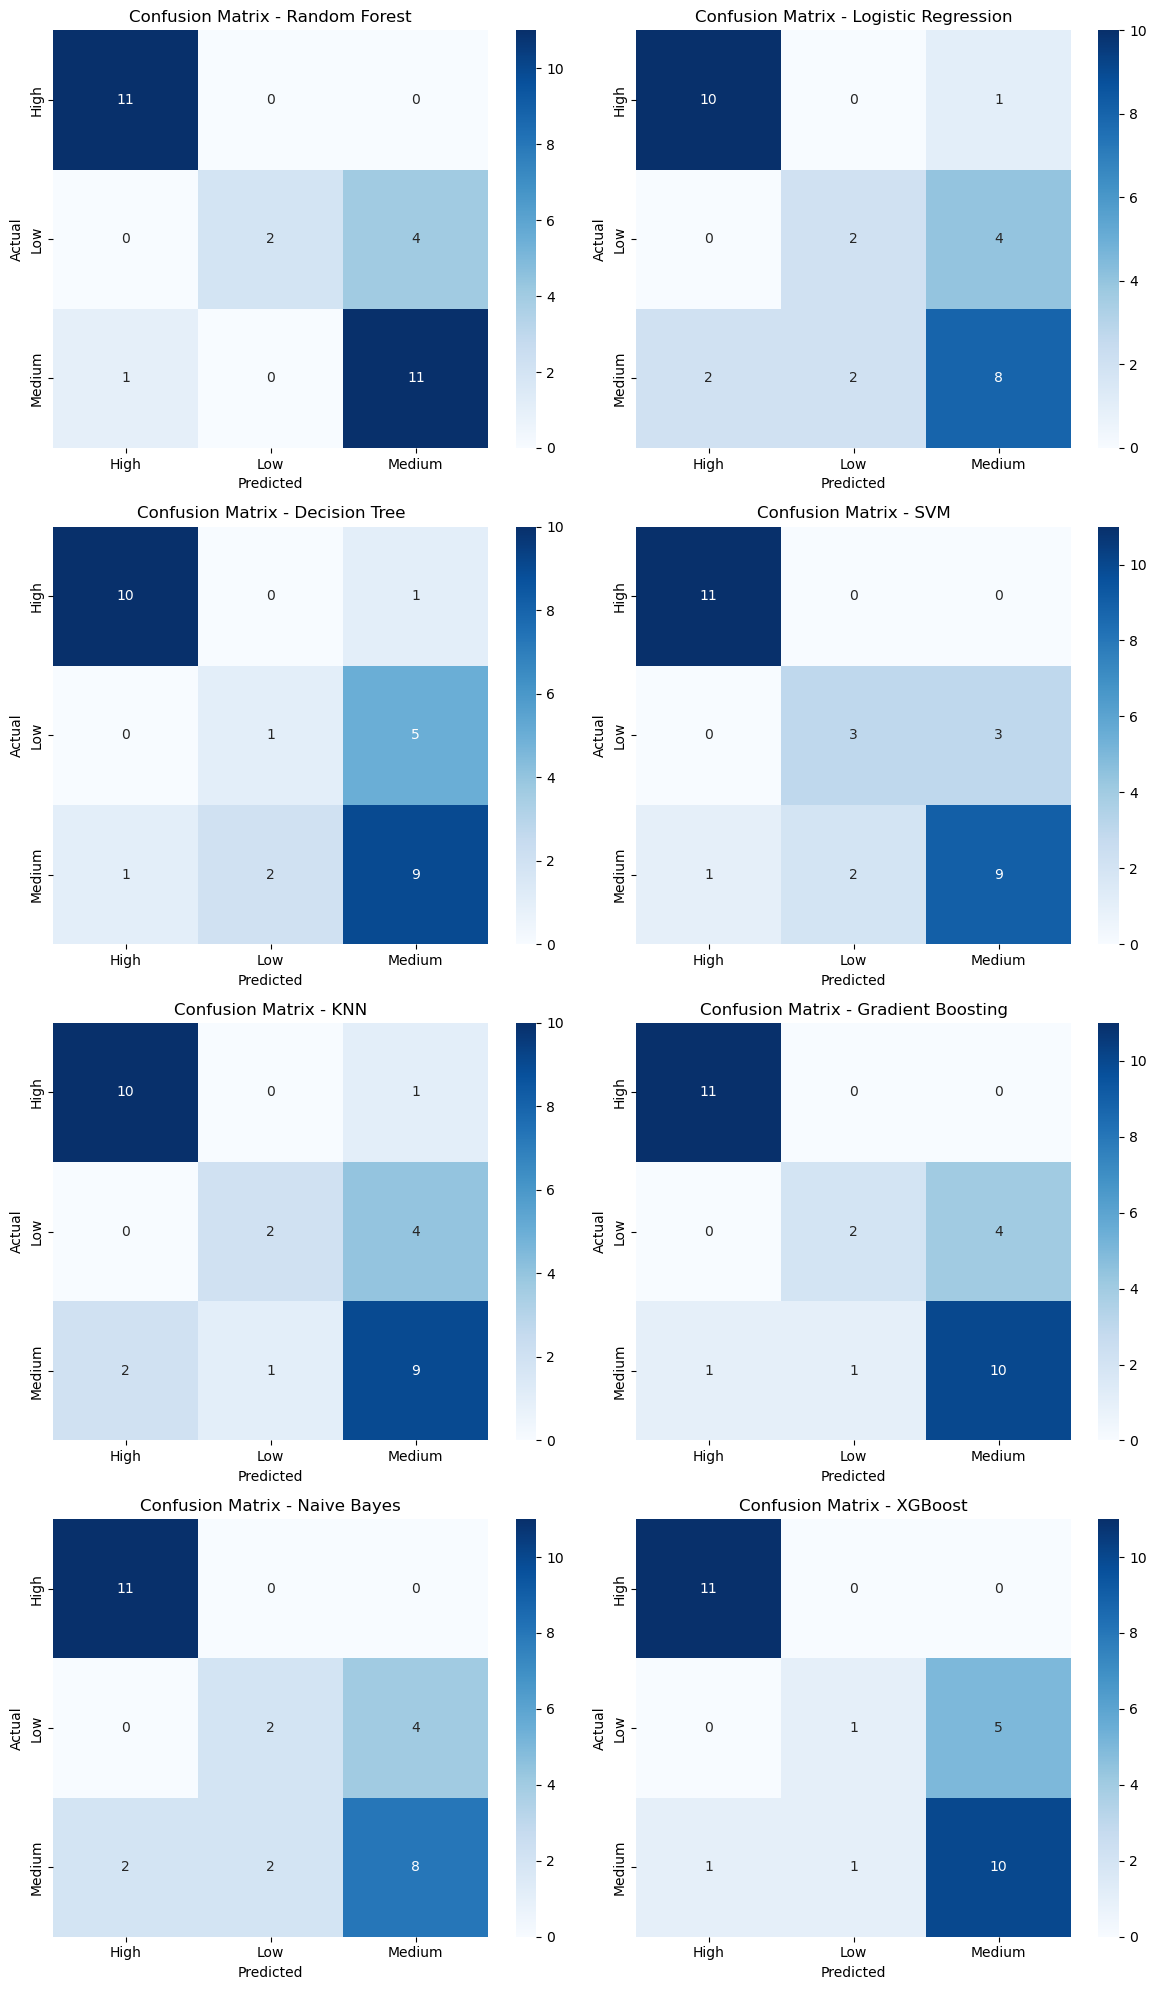


Confusion Matrices (Numerical):

Confusion Matrix for Random Forest:
[[11  0  0]
 [ 0  2  4]
 [ 1  0 11]]

Confusion Matrix for Logistic Regression:
[[10  0  1]
 [ 0  2  4]
 [ 2  2  8]]

Confusion Matrix for Decision Tree:
[[10  0  1]
 [ 0  1  5]
 [ 1  2  9]]

Confusion Matrix for SVM:
[[11  0  0]
 [ 0  3  3]
 [ 1  2  9]]

Confusion Matrix for KNN:
[[10  0  1]
 [ 0  2  4]
 [ 2  1  9]]

Confusion Matrix for Gradient Boosting:
[[11  0  0]
 [ 0  2  4]
 [ 1  1 10]]

Confusion Matrix for Naive Bayes:
[[11  0  0]
 [ 0  2  4]
 [ 2  2  8]]

Confusion Matrix for XGBoost:
[[11  0  0]
 [ 0  1  5]
 [ 1  1 10]]

Overall Model Accuracies:
Random Forest: 0.8276
Logistic Regression: 0.6897
Decision Tree: 0.6897
SVM: 0.7931
KNN: 0.7241
Gradient Boosting: 0.7931
Naive Bayes: 0.7241
XGBoost: 0.7586


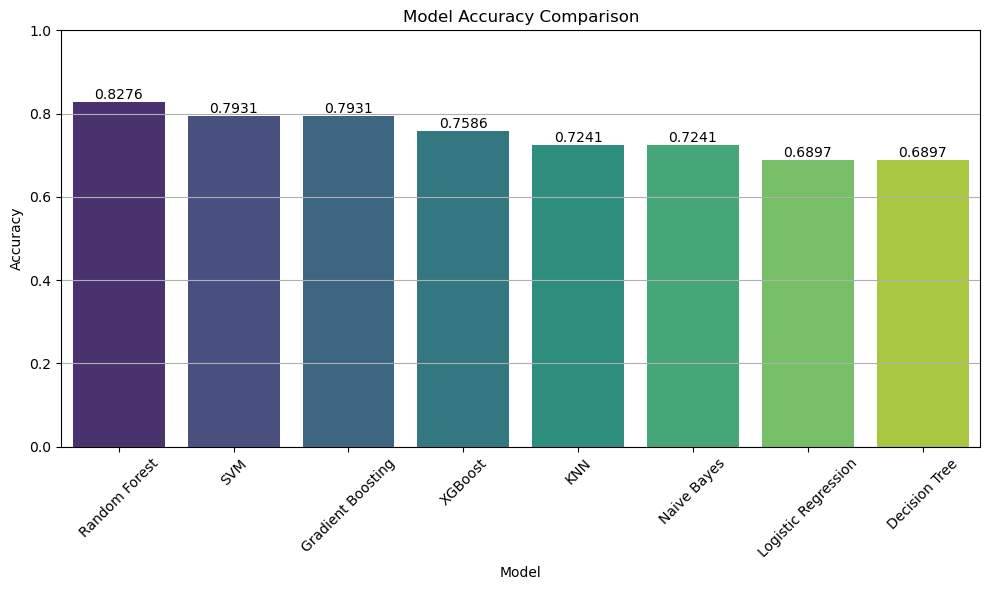

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("2024.csv")

# Select necessary columns
factors = [
    'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption',
    'Ladder score'
]

df_selected = df[factors + ['Country name']].copy()
df_selected.columns = [col.strip().replace(" ", "_").replace(":", "") for col in df_selected.columns]

# Create target variable
df_selected['Happiness_Level'] = pd.cut(
    df_selected['Ladder_score'],
    bins=[0, 4.5, 6, 10],
    labels=['Low', 'Medium', 'High']
)

# Define features and target
X = df_selected.drop(columns=['Country_name', 'Ladder_score', 'Happiness_Level'])
y = df_selected['Happiness_Level']

# Handle missing values
X = X.fillna(X.mean(numeric_only=True))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Store results
original_results = {}
confusion_matrices = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    original_results[name] = acc
    print(f"Accuracy: {acc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

# Plot all confusion matrices in 2-column grid
n_models = len(models)
cols = 2
rows = int(np.ceil(n_models / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()

for idx, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Hide any extra subplots (if odd number of models)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print confusion matrices numerically
print("\nConfusion Matrices (Numerical):")
for model_name, cm in confusion_matrices.items():
    print(f"\nConfusion Matrix for {model_name}:\n{cm}")

# Print model accuracies
print("\nOverall Model Accuracies:")
for model_name, accuracy in original_results.items():
    print(f"{model_name}: {accuracy:.4f}")

# Convert model accuracies to DataFrame
accuracy_df = pd.DataFrame(list(original_results.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Plot as histogram
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='viridis')

# Add data labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# Synthetic Data

In [261]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Orijinal veri setini yükle
data = pd.read_csv("2024.csv")

# 'Explained by: ' ifadelerini temizle
data.columns = data.columns.str.replace('Explained by: ', '', regex=False)

# Sayısal kolonlar
numeric_columns = ['Ladder score', 'upperwhisker', 'lowerwhisker',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy', 'Freedom to make life choices',
                   'Generosity', 'Perceptions of corruption', 'Dystopia + residual']

data_numeric = data[numeric_columns]

# ==========================
# 1. Multivariate Normal Sampling
# ==========================
mu = data_numeric.mean().values
cov = data_numeric.cov().values

synthetic_normal = np.random.multivariate_normal(mu, cov, size=143)
df_normal = pd.DataFrame(synthetic_normal, columns=numeric_columns)
df_normal['Country name'] = ['Normal Synthetic Country ' + str(i) for i in range(1, 144)]
df_normal = df_normal[['Country name'] + numeric_columns]
df_normal.to_csv("synthetic_normal.csv", index=False)

# ==========================
# 2. Gaussian Noise
# ==========================
noise = np.random.normal(loc=0, scale=0.1, size=data_numeric.shape)
df_noise = data_numeric + noise
df_noise['Country name'] = ['Noisy Synthetic Country ' + str(i) for i in range(1, len(df_noise)+1)]
df_noise = df_noise[['Country name'] + numeric_columns]
df_noise.to_csv("synthetic_noise.csv", index=False)

# ==========================


# 3. SMOTE-like Interpolation (NaN'leri temizleyerek)
data_numeric_clean = data_numeric.fillna(data_numeric.mean(numeric_only=True))

def smote_like_synthesis(X, n_samples=143):
    nn = NearestNeighbors(n_neighbors=5).fit(X)
    samples = []

    for _ in range(n_samples):
        idx = np.random.randint(0, X.shape[0])
        neighbors = nn.kneighbors([X[idx]], return_distance=False)[0]
        neighbor = X[np.random.choice(neighbors)]
        alpha = np.random.rand()
        synthetic = X[idx] + alpha * (neighbor - X[idx])
        samples.append(synthetic)

    return np.array(samples)

smote_synthetic = smote_like_synthesis(data_numeric_clean.values)
df_smote = pd.DataFrame(smote_synthetic, columns=numeric_columns)
df_smote['Country name'] = ['SMOTE Synthetic Country ' + str(i) for i in range(1, 144)]
df_smote = df_smote[['Country name'] + numeric_columns]
df_smote.to_csv("synthetic_smote.csv", index=False)


# ==========================

# 4. Noise Injection + Scaling
# ==========================
scaled_noise_df = (data_numeric * np.random.uniform(0.9, 1.1)) + np.random.normal(loc=0, scale=0.05, size=data_numeric.shape)
scaled_noise_df['Country name'] = ['Scaled Noise Synthetic Country ' + str(i) for i in range(1, 144)]
scaled_noise_df = scaled_noise_df[['Country name'] + numeric_columns]
scaled_noise_df.to_csv("synthetic_scaled_noise.csv", index=False)


# ==========================
# 5. Bootstrapping (with replacement from original data)
# ==========================
bootstrap_df = data_numeric.sample(n=143, replace=True).reset_index(drop=True)
bootstrap_df['Country name'] = ['Bootstrap Synthetic Country ' + str(i) for i in range(1, 144)]
bootstrap_df = bootstrap_df[['Country name'] + numeric_columns]
bootstrap_df.to_csv("synthetic_bootstrap.csv", index=False)

# ==========================
# 6. Uniform Sampling
# ==========================
min_vals = data_numeric.min()
max_vals = data_numeric.max()
uniform_synthetic = np.random.uniform(low=min_vals, high=max_vals, size=(143, len(numeric_columns)))
df_uniform = pd.DataFrame(uniform_synthetic, columns=numeric_columns)
df_uniform['Country name'] = ['Uniform Synthetic Country ' + str(i) for i in range(1, 144)]
df_uniform = df_uniform[['Country name'] + numeric_columns]
df_uniform.to_csv("synthetic_uniform.csv", index=False)

# ==========================
# 7. Truncated Normal Sampling
# ==========================
from scipy.stats import truncnorm

def truncated_normal(mean, std, low, upp, size):
    return truncnorm((low - mean) / std, (upp - mean) / std, loc=mean, scale=std).rvs(size)

trunc_data = {}
for col in numeric_columns:
    col_mean = data_numeric[col].mean()
    col_std = data_numeric[col].std()
    col_min = data_numeric[col].min()
    col_max = data_numeric[col].max()
    trunc_data[col] = truncated_normal(col_mean, col_std, col_min, col_max, 143)

df_truncnorm = pd.DataFrame(trunc_data)
df_truncnorm['Country name'] = ['TruncNorm Synthetic Country ' + str(i) for i in range(1, 144)]
df_truncnorm = df_truncnorm[['Country name'] + numeric_columns]
df_truncnorm.to_csv("synthetic_truncnorm.csv", index=False)

# === Sonuç Bilgisi ===
print("Tüm yöntemler için ayrı ayrı sentetik veri setleri oluşturuldu ve kaydedildi.")



C:\Users\ÇELİK\AppData\Local\Temp\ipykernel_21000\2915662603.py:25: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  synthetic_normal = np.random.multivariate_normal(mu, cov, size=143)


Tüm yöntemler için ayrı ayrı sentetik veri setleri oluşturuldu ve kaydedildi.


# 1. Multivariate Normal Sampling


=== Random Forest ===
Accuracy: 0.7586

Classification Report:
              precision    recall  f1-score   support

        High       0.89      1.00      0.94         8
         Low       0.33      0.50      0.40         4
      Medium       0.86      0.71      0.77        17

    accuracy                           0.76        29
   macro avg       0.69      0.74      0.71        29
weighted avg       0.79      0.76      0.77        29

Confusion Matrix:
[[ 8  0  0]
 [ 0  2  2]
 [ 1  4 12]]

=== Logistic Regression ===
Accuracy: 0.7931

Classification Report:
              precision    recall  f1-score   support

        High       0.80      1.00      0.89         8
         Low       0.50      0.50      0.50         4
      Medium       0.87      0.76      0.81        17

    accuracy                           0.79        29
   macro avg       0.72      0.75      0.73        29
weighted avg       0.80      0.79      0.79        29

Confusion Matrix:
[[ 8  0  0]
 [ 0  2  2]
 [ 2  2

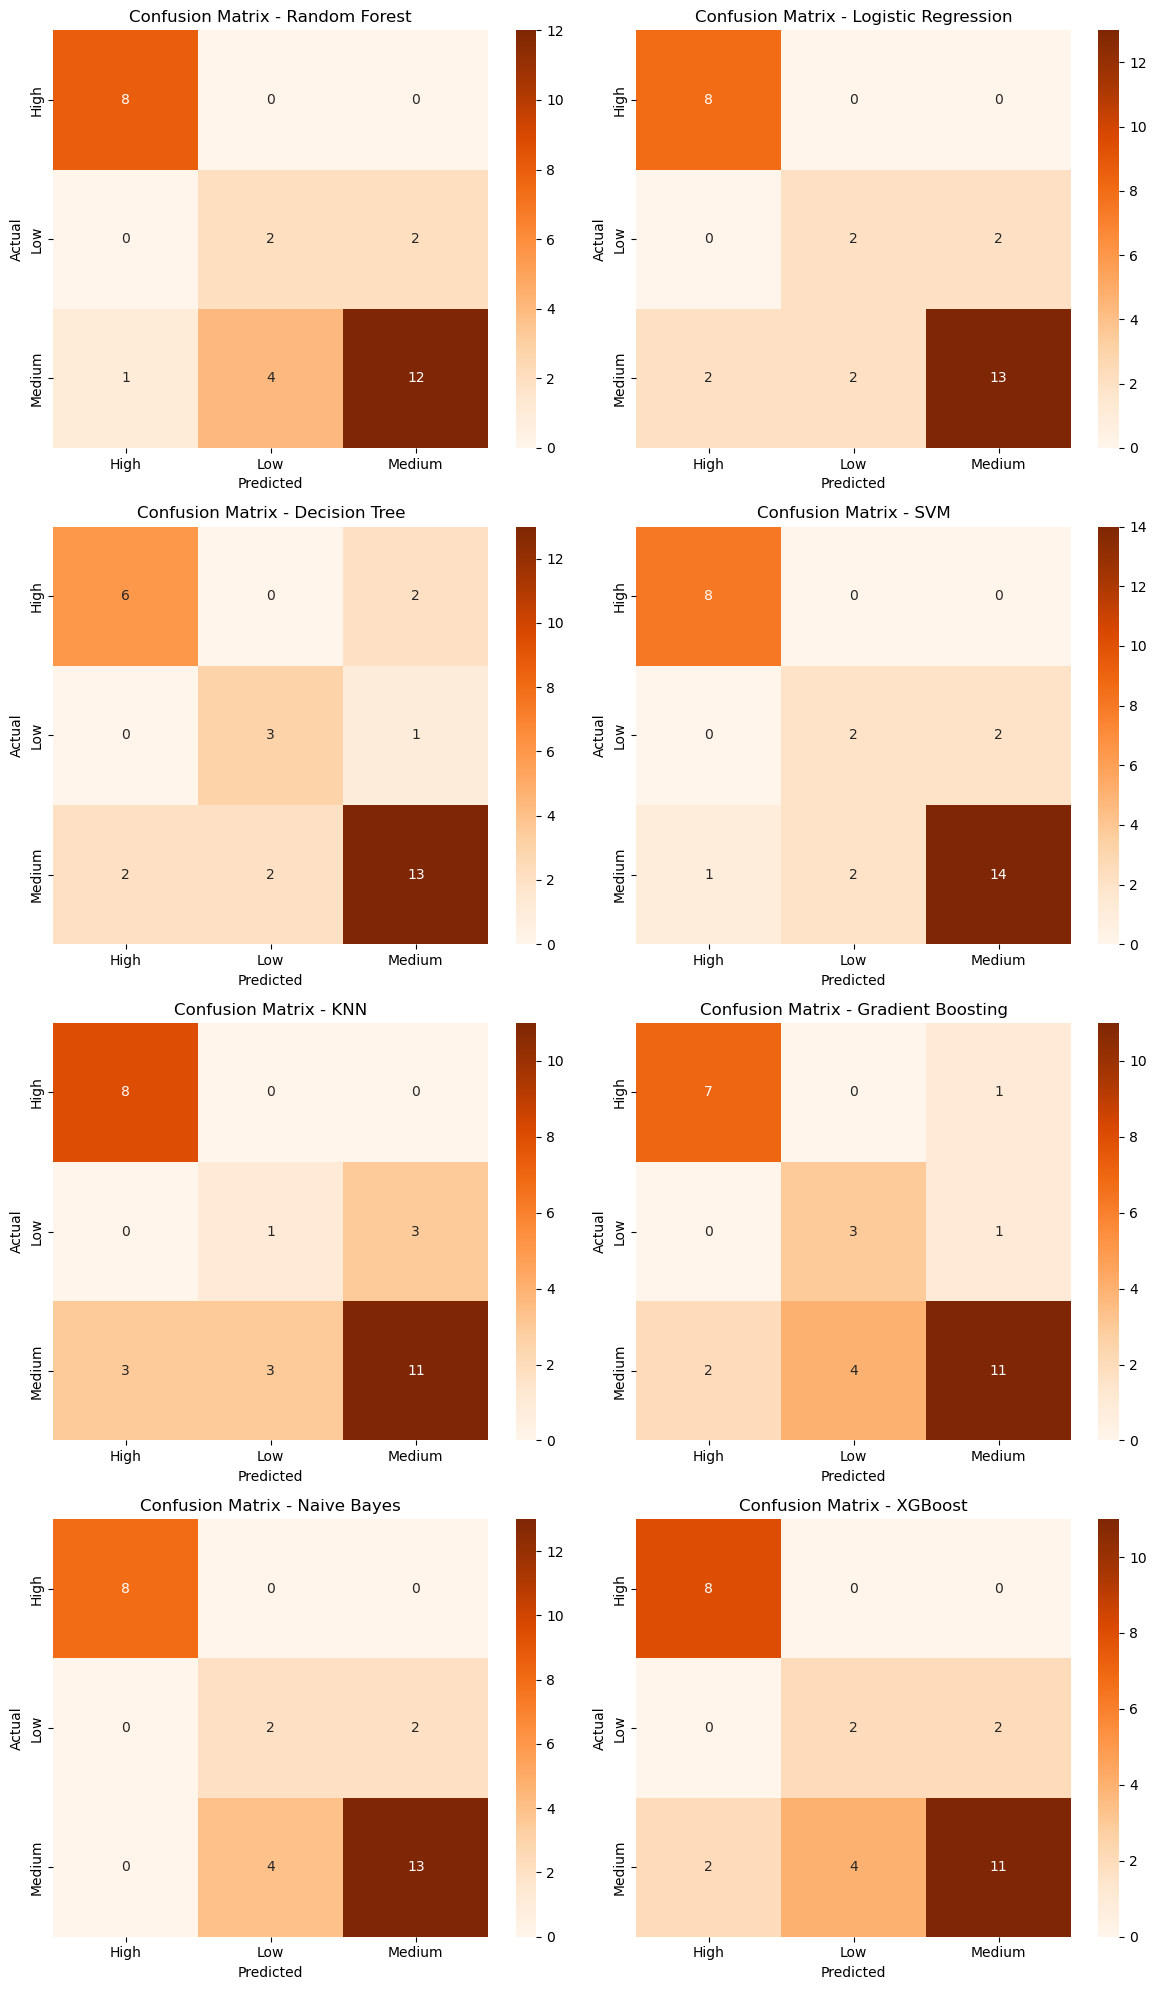


Overall Model Accuracies on Synthetic Data:
Random Forest: 0.7586
Logistic Regression: 0.7931
Decision Tree: 0.7586
SVM: 0.8276
KNN: 0.6897
Gradient Boosting: 0.7241
Naive Bayes: 0.7931
XGBoost: 0.7241


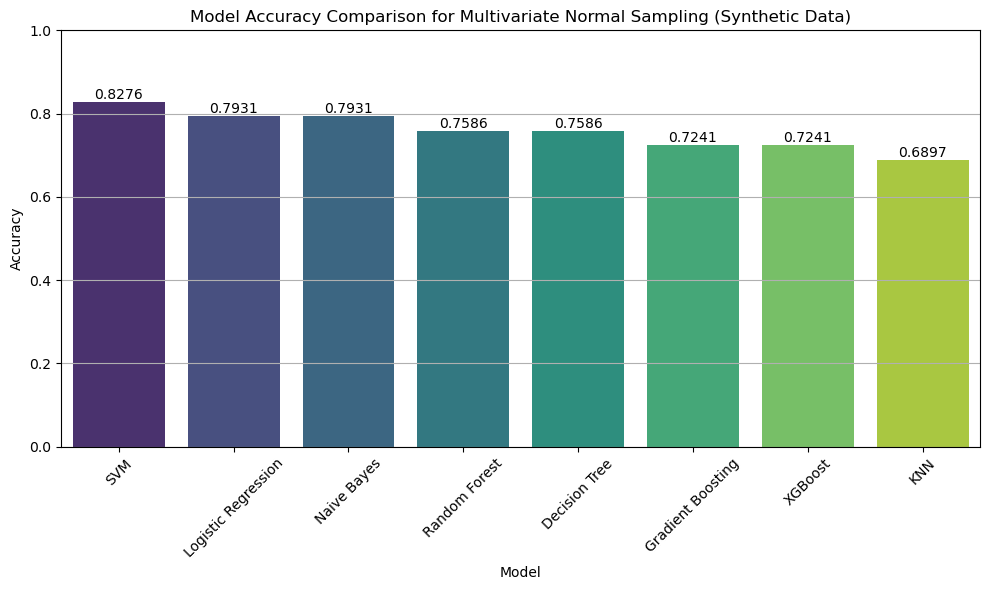

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Load synthetic dataset
df = pd.read_csv("synthetic_normal.csv")

# Select features
factors = [
    'Ladder score',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

df_selected = df[factors + ['Country name']].copy()
df_selected.columns = [col.strip().replace(" ", "_").replace(":", "") for col in df_selected.columns]

# Create target variable
df_selected['Happiness_Level'] = pd.cut(
    df_selected['Ladder_score'],
    bins=[0, 4.5, 6, 10],
    labels=['Low', 'Medium', 'High']
)

# Features and target
X = df_selected.drop(columns=['Country_name', 'Ladder_score', 'Happiness_Level'])
y = df_selected['Happiness_Level']

# Fill missing
X = X.fillna(X.mean(numeric_only=True))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Store results
synthetic_results = {}
confusion_matrices = {}

# Train and evaluate
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    synthetic_results[name] = acc
    print(f"Accuracy: {acc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    print("Confusion Matrix:")
    print(cm)

# Plot confusion matrices
n_models = len(models)
cols = 2
rows = int(np.ceil(n_models / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()

for idx, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges",
                xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print and visualize accuracies
print("\nOverall Model Accuracies on Synthetic Data:")
for model_name, accuracy in synthetic_results.items():
    print(f"{model_name}: {accuracy:.4f}")

# Accuracy comparison chart
accuracy_df = pd.DataFrame(list(synthetic_results.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison for Multivariate Normal Sampling (Synthetic Data)")
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


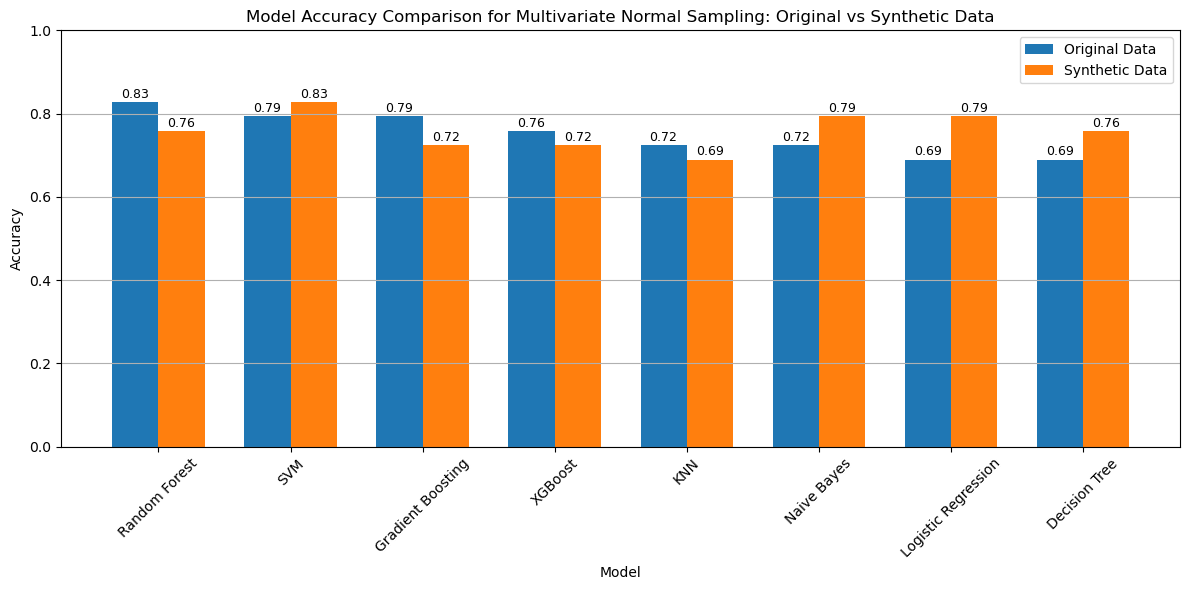

In [278]:
# == ORIGINAL vs SYNTHETIC Comparative Bar Plot ==
comparison_df = pd.DataFrame({
    'Original Data': pd.Series(original_results),
    'Synthetic Data': pd.Series(synthetic_results)
}).reset_index().rename(columns={'index': 'Model'})

comparison_df = comparison_df.sort_values(by='Original Data', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(comparison_df['Model']))

plt.bar(x - bar_width/2, comparison_df['Original Data'], width=bar_width, label='Original Data')
plt.bar(x + bar_width/2, comparison_df['Synthetic Data'], width=bar_width, label='Synthetic Data')

# Add value labels
for i in range(len(x)):
    plt.text(x[i] - bar_width/2, comparison_df['Original Data'].iloc[i] + 0.01,
             f"{comparison_df['Original Data'].iloc[i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i] + bar_width/2, comparison_df['Synthetic Data'].iloc[i] + 0.01,
             f"{comparison_df['Synthetic Data'].iloc[i]:.2f}", ha='center', fontsize=9)

plt.xticks(ticks=x, labels=comparison_df['Model'], rotation=45)
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison for Multivariate Normal Sampling: Original vs Synthetic Data')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# 2. Gaussian Noise


=== Random Forest ===
Accuracy: 0.6207

Classification Report:
              precision    recall  f1-score   support

        High       0.75      1.00      0.86        12
         Low       0.00      0.00      0.00         6
      Medium       0.50      0.55      0.52        11

    accuracy                           0.62        29
   macro avg       0.42      0.52      0.46        29
weighted avg       0.50      0.62      0.55        29

Confusion Matrix:
[[12  0  0]
 [ 0  0  6]
 [ 4  1  6]]

=== Logistic Regression ===
Accuracy: 0.6897

Classification Report:
              precision    recall  f1-score   support

        High       0.80      1.00      0.89        12
         Low       0.50      0.17      0.25         6
      Medium       0.58      0.64      0.61        11

    accuracy                           0.69        29
   macro avg       0.63      0.60      0.58        29
weighted avg       0.66      0.69      0.65        29

Confusion Matrix:
[[12  0  0]
 [ 0  1  5]
 [ 3  1

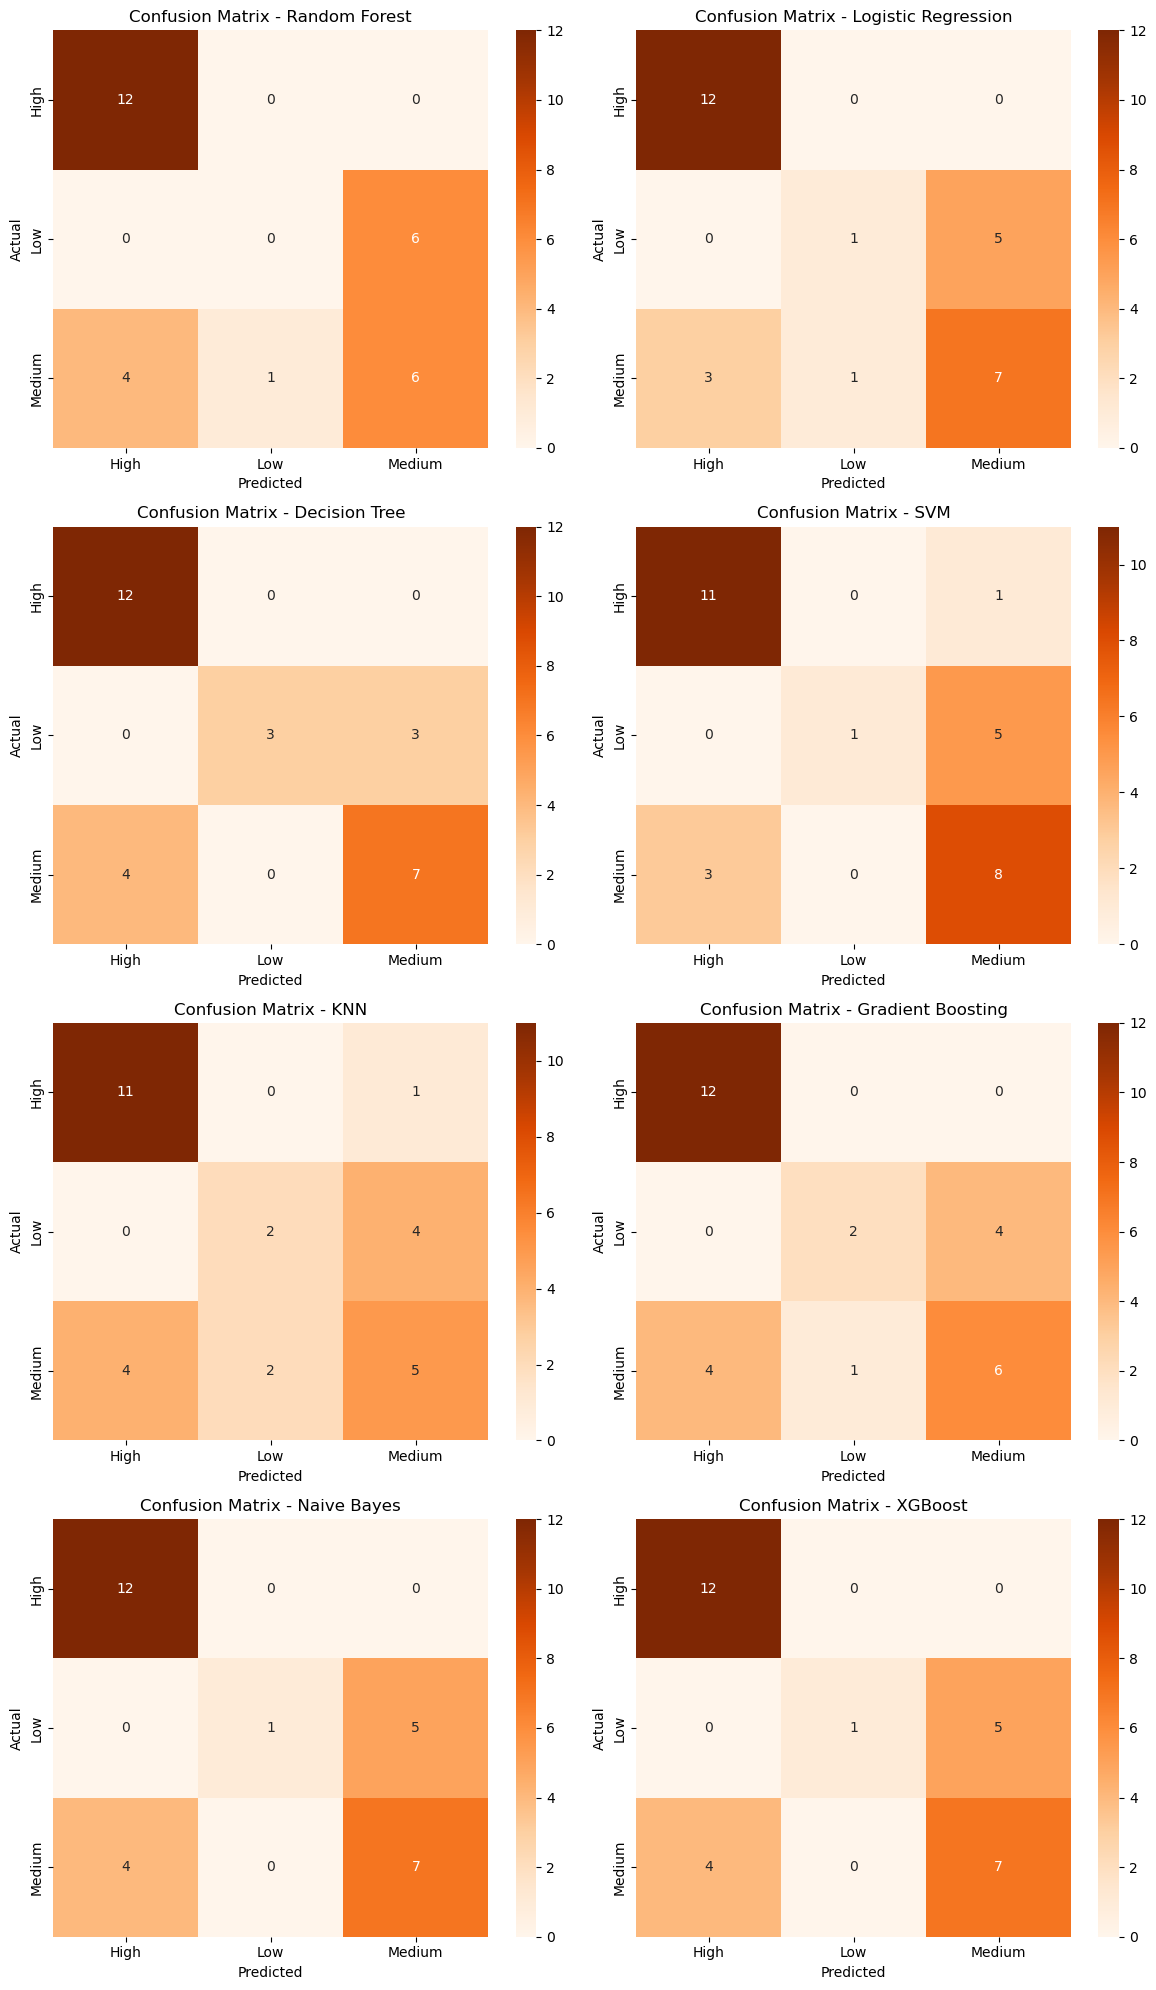


Overall Model Accuracies on Synthetic Data:
Random Forest: 0.6207
Logistic Regression: 0.6897
Decision Tree: 0.7586
SVM: 0.6897
KNN: 0.6207
Gradient Boosting: 0.6897
Naive Bayes: 0.6897
XGBoost: 0.6897


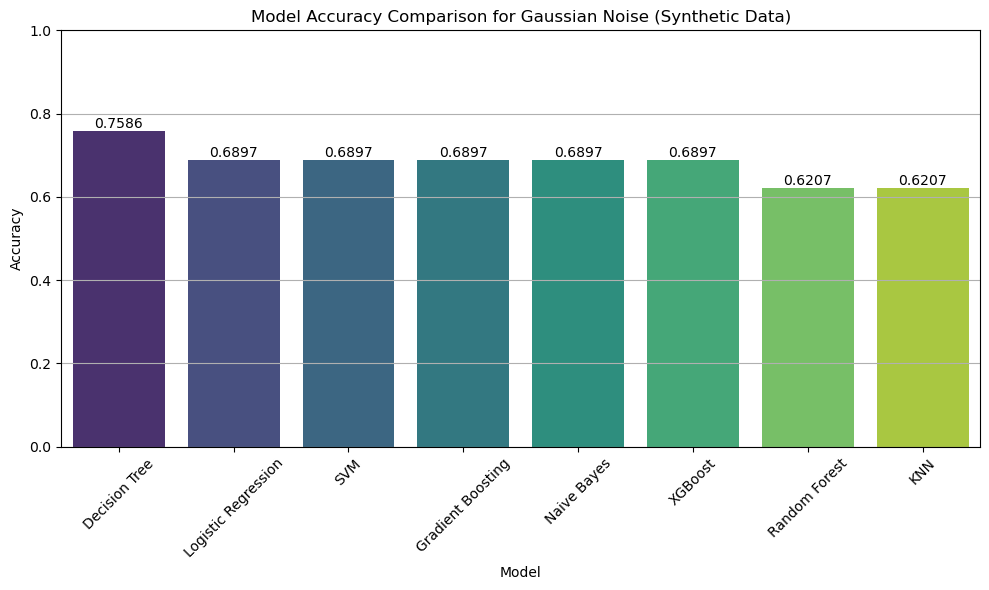

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Load synthetic dataset
df = pd.read_csv("synthetic_noise.csv")

# Select features
factors = [
    'Ladder score',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

df_selected = df[factors + ['Country name']].copy()
df_selected.columns = [col.strip().replace(" ", "_").replace(":", "") for col in df_selected.columns]

# Create target variable
df_selected['Happiness_Level'] = pd.cut(
    df_selected['Ladder_score'],
    bins=[0, 4.5, 6, 10],
    labels=['Low', 'Medium', 'High']
)

# Features and target
X = df_selected.drop(columns=['Country_name', 'Ladder_score', 'Happiness_Level'])
y = df_selected['Happiness_Level']

# Fill missing
X = X.fillna(X.mean(numeric_only=True))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Store results
synthetic_results = {}
confusion_matrices = {}

# Train and evaluate
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    synthetic_results[name] = acc
    print(f"Accuracy: {acc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    print("Confusion Matrix:")
    print(cm)

# Plot confusion matrices
n_models = len(models)
cols = 2
rows = int(np.ceil(n_models / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()

for idx, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges",
                xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print and visualize accuracies
print("\nOverall Model Accuracies on Synthetic Data:")
for model_name, accuracy in synthetic_results.items():
    print(f"{model_name}: {accuracy:.4f}")

# Accuracy comparison chart
accuracy_df = pd.DataFrame(list(synthetic_results.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison for Gaussian Noise (Synthetic Data)")
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

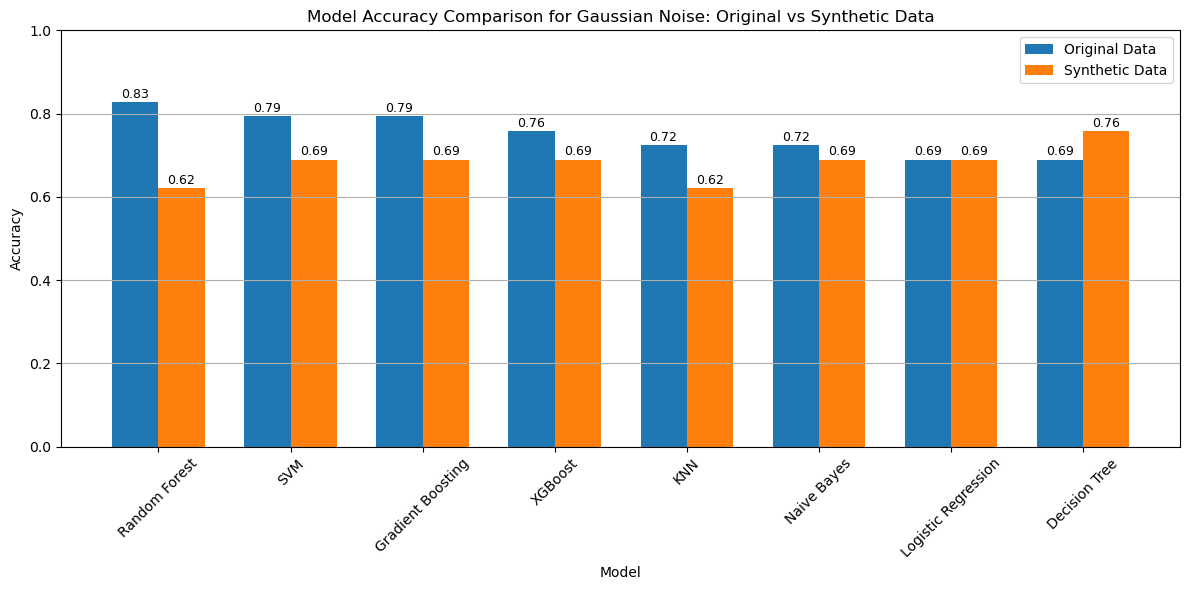

In [5]:
# == ORIGINAL vs SYNTHETIC Comparative Bar Plot ==
comparison_df = pd.DataFrame({
    'Original Data': pd.Series(original_results),
    'Synthetic Data': pd.Series(synthetic_results)
}).reset_index().rename(columns={'index': 'Model'})

comparison_df = comparison_df.sort_values(by='Original Data', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(comparison_df['Model']))

plt.bar(x - bar_width/2, comparison_df['Original Data'], width=bar_width, label='Original Data')
plt.bar(x + bar_width/2, comparison_df['Synthetic Data'], width=bar_width, label='Synthetic Data')

# Add value labels
for i in range(len(x)):
    plt.text(x[i] - bar_width/2, comparison_df['Original Data'].iloc[i] + 0.01,
             f"{comparison_df['Original Data'].iloc[i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i] + bar_width/2, comparison_df['Synthetic Data'].iloc[i] + 0.01,
             f"{comparison_df['Synthetic Data'].iloc[i]:.2f}", ha='center', fontsize=9)

plt.xticks(ticks=x, labels=comparison_df['Model'], rotation=45)
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison for Gaussian Noise: Original vs Synthetic Data')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# 3. SMOTE-like Interpolation 


=== Random Forest ===
Accuracy: 0.8966

Classification Report:
              precision    recall  f1-score   support

        High       0.83      1.00      0.91        10
         Low       1.00      0.75      0.86         4
      Medium       0.93      0.87      0.90        15

    accuracy                           0.90        29
   macro avg       0.92      0.87      0.89        29
weighted avg       0.91      0.90      0.90        29

Confusion Matrix:
[[10  0  0]
 [ 0  3  1]
 [ 2  0 13]]

=== Logistic Regression ===
Accuracy: 0.7586

Classification Report:
              precision    recall  f1-score   support

        High       0.77      1.00      0.87        10
         Low       0.50      0.75      0.60         4
      Medium       0.90      0.60      0.72        15

    accuracy                           0.76        29
   macro avg       0.72      0.78      0.73        29
weighted avg       0.80      0.76      0.76        29

Confusion Matrix:
[[10  0  0]
 [ 0  3  1]
 [ 3  3

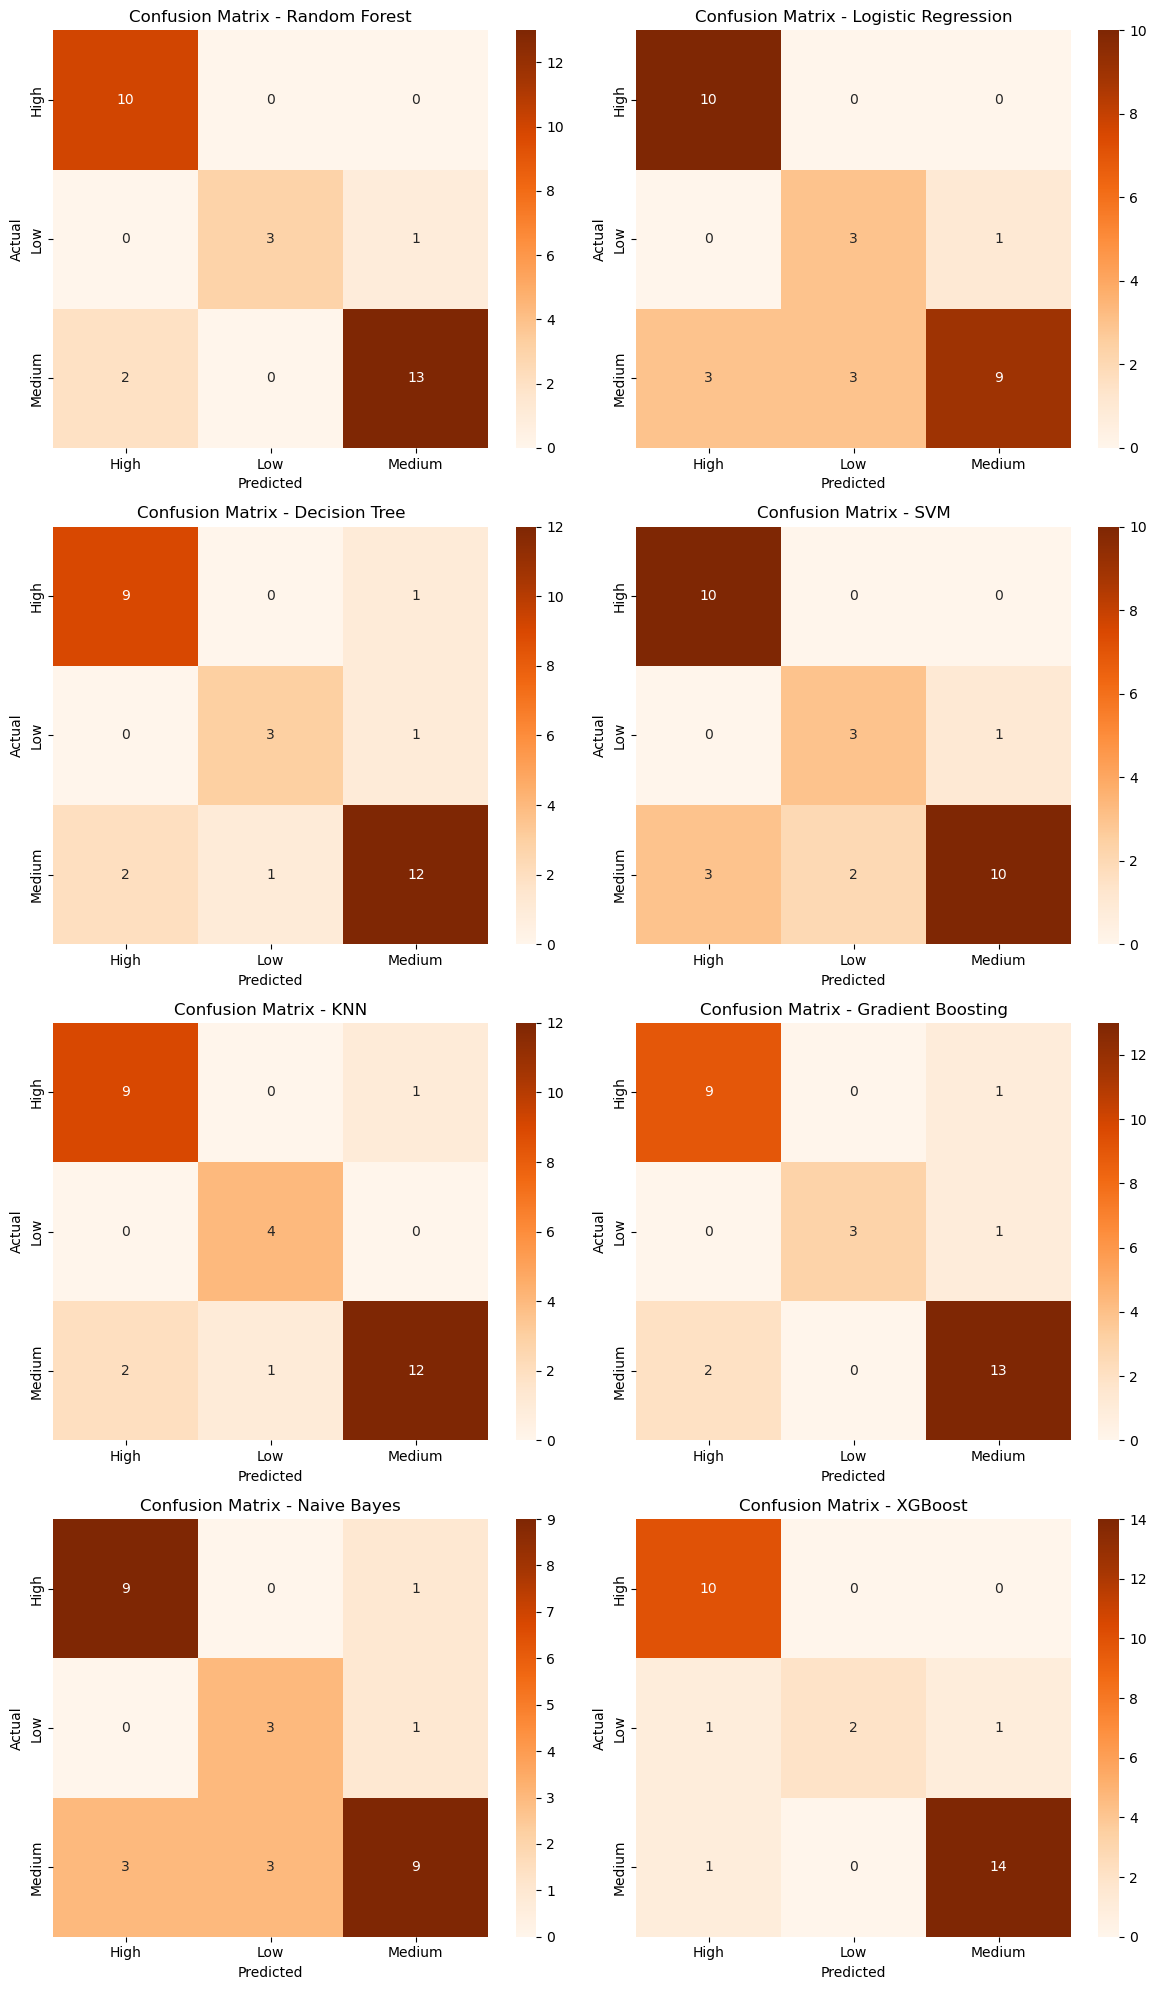


Overall Model Accuracies on Synthetic Data:
Random Forest: 0.8966
Logistic Regression: 0.7586
Decision Tree: 0.8276
SVM: 0.7931
KNN: 0.8621
Gradient Boosting: 0.8621
Naive Bayes: 0.7241
XGBoost: 0.8966


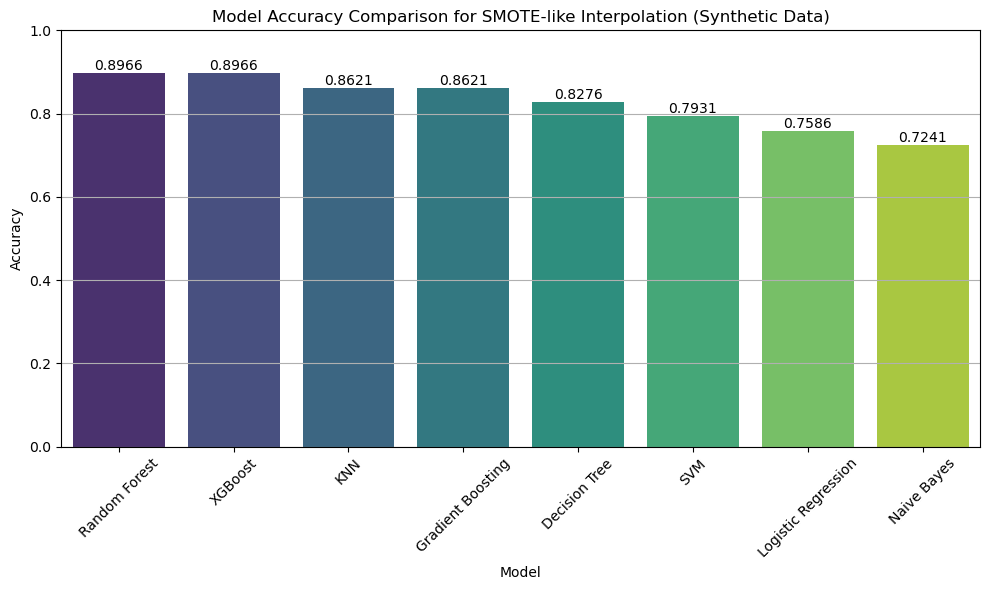

In [282]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Load synthetic dataset
df = pd.read_csv("synthetic_smote.csv")

# Select features
factors = [
    'Ladder score',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

df_selected = df[factors + ['Country name']].copy()
df_selected.columns = [col.strip().replace(" ", "_").replace(":", "") for col in df_selected.columns]

# Create target variable
df_selected['Happiness_Level'] = pd.cut(
    df_selected['Ladder_score'],
    bins=[0, 4.5, 6, 10],
    labels=['Low', 'Medium', 'High']
)

# Features and target
X = df_selected.drop(columns=['Country_name', 'Ladder_score', 'Happiness_Level'])
y = df_selected['Happiness_Level']

# Fill missing
X = X.fillna(X.mean(numeric_only=True))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Store results
synthetic_results = {}
confusion_matrices = {}

# Train and evaluate
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    synthetic_results[name] = acc
    print(f"Accuracy: {acc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    print("Confusion Matrix:")
    print(cm)

# Plot confusion matrices
n_models = len(models)
cols = 2
rows = int(np.ceil(n_models / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()

for idx, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges",
                xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print and visualize accuracies
print("\nOverall Model Accuracies on Synthetic Data:")
for model_name, accuracy in synthetic_results.items():
    print(f"{model_name}: {accuracy:.4f}")

# Accuracy comparison chart
accuracy_df = pd.DataFrame(list(synthetic_results.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison for SMOTE-like Interpolation (Synthetic Data)")
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

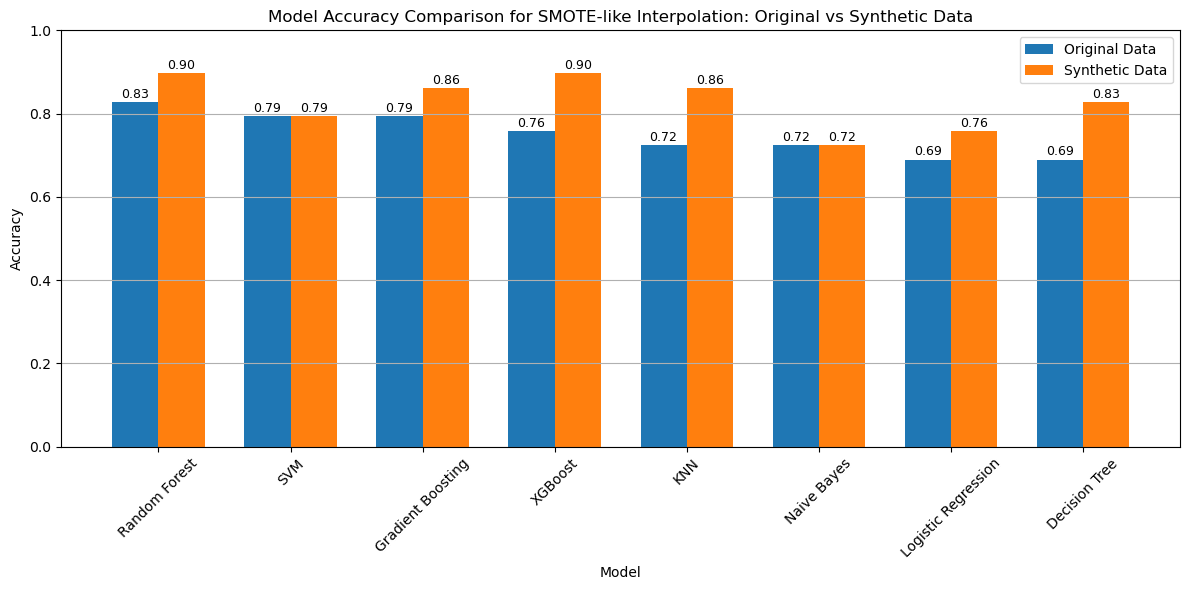

In [283]:
# == ORIGINAL vs SYNTHETIC Comparative Bar Plot ==
comparison_df = pd.DataFrame({
    'Original Data': pd.Series(original_results),
    'Synthetic Data': pd.Series(synthetic_results)
}).reset_index().rename(columns={'index': 'Model'})

comparison_df = comparison_df.sort_values(by='Original Data', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(comparison_df['Model']))

plt.bar(x - bar_width/2, comparison_df['Original Data'], width=bar_width, label='Original Data')
plt.bar(x + bar_width/2, comparison_df['Synthetic Data'], width=bar_width, label='Synthetic Data')

# Add value labels
for i in range(len(x)):
    plt.text(x[i] - bar_width/2, comparison_df['Original Data'].iloc[i] + 0.01,
             f"{comparison_df['Original Data'].iloc[i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i] + bar_width/2, comparison_df['Synthetic Data'].iloc[i] + 0.01,
             f"{comparison_df['Synthetic Data'].iloc[i]:.2f}", ha='center', fontsize=9)

plt.xticks(ticks=x, labels=comparison_df['Model'], rotation=45)
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison for SMOTE-like Interpolation: Original vs Synthetic Data')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# 4. Noise Injection + Scaling


=== Random Forest ===
Accuracy: 0.7241

Classification Report:
              precision    recall  f1-score   support

        High       0.92      0.92      0.92        13
         Low       0.33      0.20      0.25         5
      Medium       0.62      0.73      0.67        11

    accuracy                           0.72        29
   macro avg       0.62      0.62      0.61        29
weighted avg       0.70      0.72      0.71        29

Confusion Matrix:
[[12  0  1]
 [ 0  1  4]
 [ 1  2  8]]

=== Logistic Regression ===
Accuracy: 0.7586

Classification Report:
              precision    recall  f1-score   support

        High       0.92      0.92      0.92        13
         Low       0.50      0.20      0.29         5
      Medium       0.64      0.82      0.72        11

    accuracy                           0.76        29
   macro avg       0.69      0.65      0.64        29
weighted avg       0.74      0.76      0.74        29

Confusion Matrix:
[[12  0  1]
 [ 0  1  4]
 [ 1  1

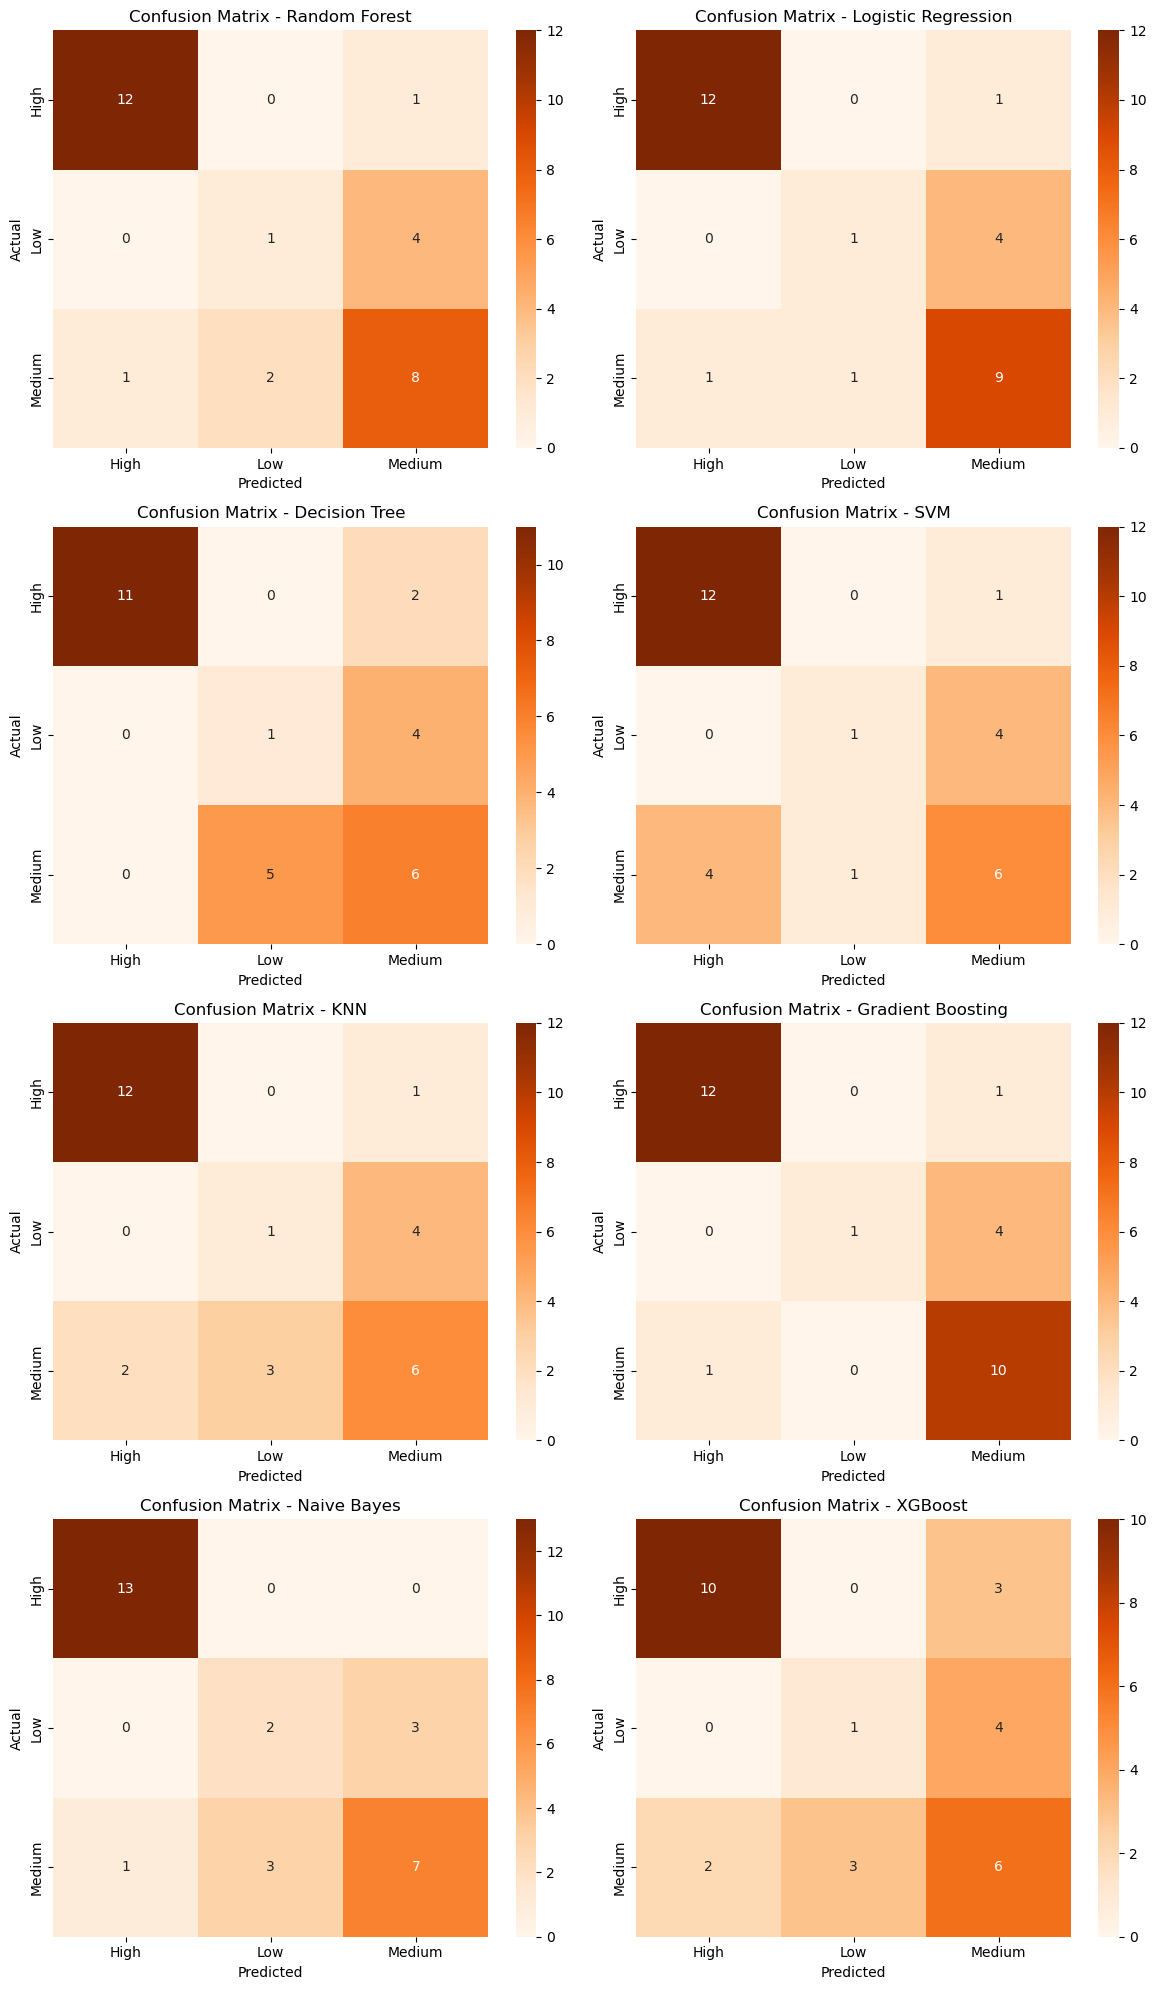


Overall Model Accuracies on Synthetic Data:
Random Forest: 0.7241
Logistic Regression: 0.7586
Decision Tree: 0.6207
SVM: 0.6552
KNN: 0.6552
Gradient Boosting: 0.7931
Naive Bayes: 0.7586
XGBoost: 0.5862


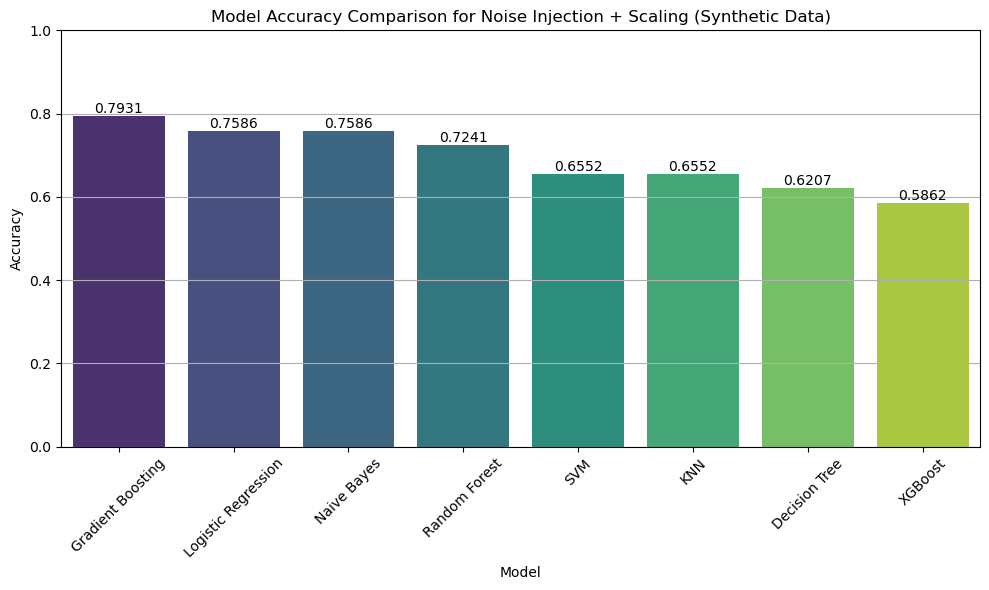

In [284]:
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Load synthetic dataset
df = pd.read_csv("synthetic_scaled_noise.csv")

# Select features
factors = [
    'Ladder score',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

df_selected = df[factors + ['Country name']].copy()
df_selected.columns = [col.strip().replace(" ", "_").replace(":", "") for col in df_selected.columns]

# Create target variable
df_selected['Happiness_Level'] = pd.cut(
    df_selected['Ladder_score'],
    bins=[0, 4.5, 6, 10],
    labels=['Low', 'Medium', 'High']
)

# Features and target
X = df_selected.drop(columns=['Country_name', 'Ladder_score', 'Happiness_Level'])
y = df_selected['Happiness_Level']

# Fill missing
X = X.fillna(X.mean(numeric_only=True))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Store results
synthetic_results = {}
confusion_matrices = {}

# Train and evaluate
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    synthetic_results[name] = acc
    print(f"Accuracy: {acc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    print("Confusion Matrix:")
    print(cm)

# Plot confusion matrices
n_models = len(models)
cols = 2
rows = int(np.ceil(n_models / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()

for idx, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges",
                xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print and visualize accuracies
print("\nOverall Model Accuracies on Synthetic Data:")
for model_name, accuracy in synthetic_results.items():
    print(f"{model_name}: {accuracy:.4f}")

# Accuracy comparison chart
accuracy_df = pd.DataFrame(list(synthetic_results.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison for Noise Injection + Scaling (Synthetic Data)")
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

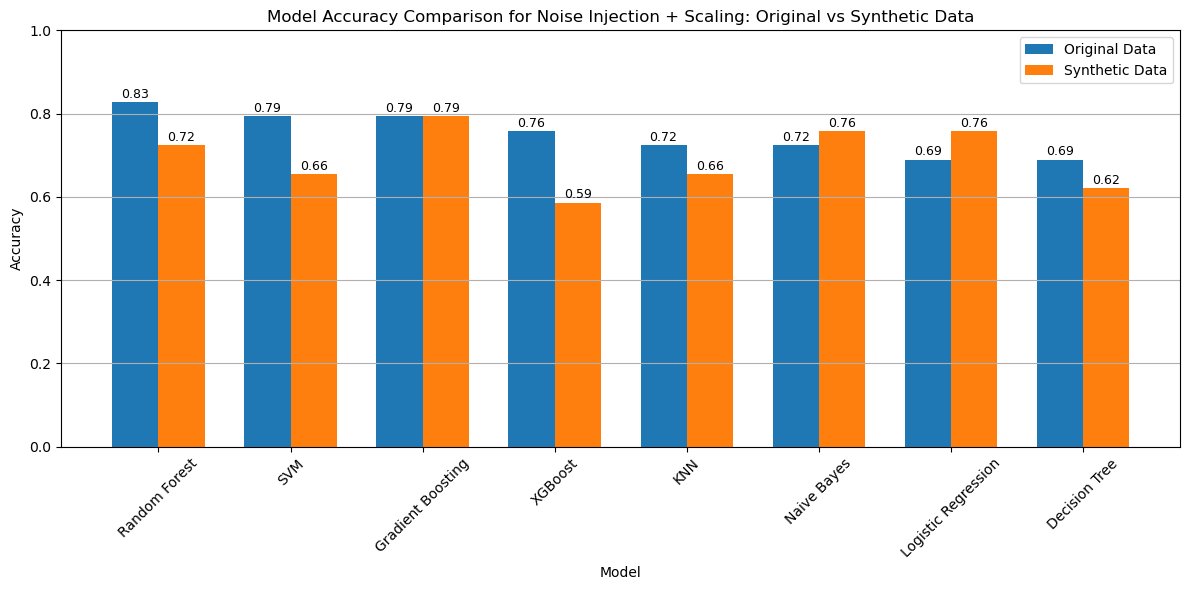

In [285]:
# == ORIGINAL vs SYNTHETIC Comparative Bar Plot ==
comparison_df = pd.DataFrame({
    'Original Data': pd.Series(original_results),
    'Synthetic Data': pd.Series(synthetic_results)
}).reset_index().rename(columns={'index': 'Model'})

comparison_df = comparison_df.sort_values(by='Original Data', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(comparison_df['Model']))

plt.bar(x - bar_width/2, comparison_df['Original Data'], width=bar_width, label='Original Data')
plt.bar(x + bar_width/2, comparison_df['Synthetic Data'], width=bar_width, label='Synthetic Data')

# Add value labels
for i in range(len(x)):
    plt.text(x[i] - bar_width/2, comparison_df['Original Data'].iloc[i] + 0.01,
             f"{comparison_df['Original Data'].iloc[i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i] + bar_width/2, comparison_df['Synthetic Data'].iloc[i] + 0.01,
             f"{comparison_df['Synthetic Data'].iloc[i]:.2f}", ha='center', fontsize=9)

plt.xticks(ticks=x, labels=comparison_df['Model'], rotation=45)
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison for Noise Injection + Scaling: Original vs Synthetic Data')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# 5. Bootstrapping (with replacement from original data)


=== Random Forest ===
Accuracy: 0.8966

Classification Report:
              precision    recall  f1-score   support

        High       0.89      1.00      0.94         8
         Low       1.00      0.75      0.86         8
      Medium       0.86      0.92      0.89        13

    accuracy                           0.90        29
   macro avg       0.92      0.89      0.90        29
weighted avg       0.91      0.90      0.89        29

Confusion Matrix:
[[ 8  0  0]
 [ 0  6  2]
 [ 1  0 12]]

=== Logistic Regression ===
Accuracy: 0.7586

Classification Report:
              precision    recall  f1-score   support

        High       0.89      1.00      0.94         8
         Low       0.75      0.38      0.50         8
      Medium       0.69      0.85      0.76        13

    accuracy                           0.76        29
   macro avg       0.78      0.74      0.73        29
weighted avg       0.76      0.76      0.74        29

Confusion Matrix:
[[ 8  0  0]
 [ 0  3  5]
 [ 1  1

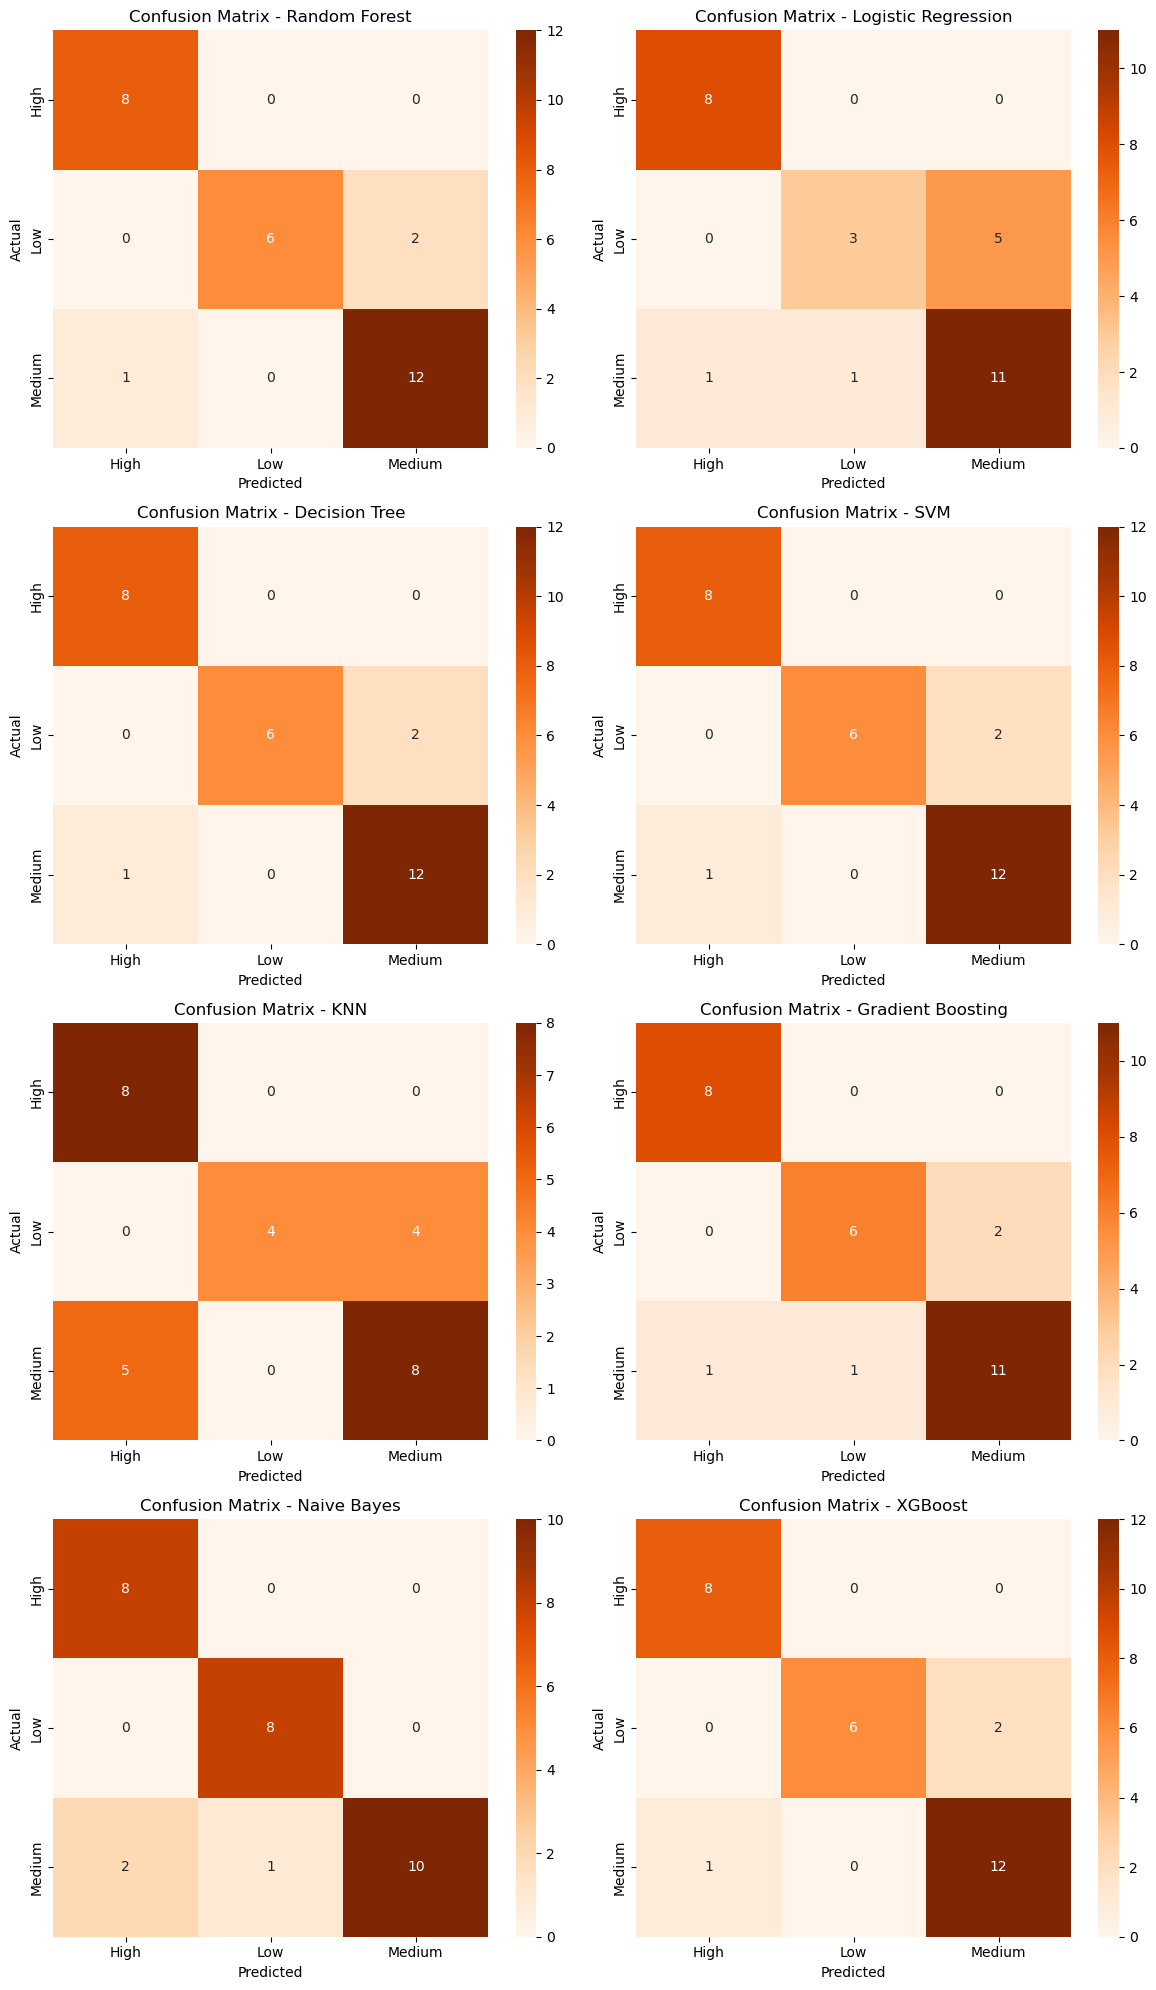


Overall Model Accuracies on Synthetic Data:
Random Forest: 0.8966
Logistic Regression: 0.7586
Decision Tree: 0.8966
SVM: 0.8966
KNN: 0.6897
Gradient Boosting: 0.8621
Naive Bayes: 0.8966
XGBoost: 0.8966


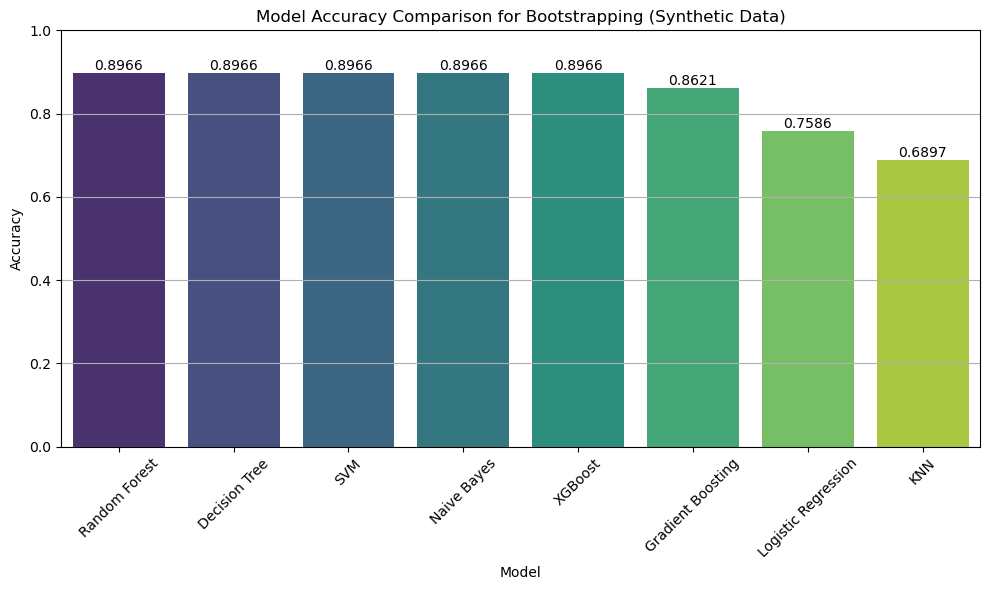

In [286]:
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Load synthetic dataset
df = pd.read_csv("synthetic_bootstrap.csv")

# Select features
factors = [
    'Ladder score',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

df_selected = df[factors + ['Country name']].copy()
df_selected.columns = [col.strip().replace(" ", "_").replace(":", "") for col in df_selected.columns]

# Create target variable
df_selected['Happiness_Level'] = pd.cut(
    df_selected['Ladder_score'],
    bins=[0, 4.5, 6, 10],
    labels=['Low', 'Medium', 'High']
)

# Features and target
X = df_selected.drop(columns=['Country_name', 'Ladder_score', 'Happiness_Level'])
y = df_selected['Happiness_Level']

# Fill missing
X = X.fillna(X.mean(numeric_only=True))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Store results
synthetic_results = {}
confusion_matrices = {}

# Train and evaluate
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    synthetic_results[name] = acc
    print(f"Accuracy: {acc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    print("Confusion Matrix:")
    print(cm)

# Plot confusion matrices
n_models = len(models)
cols = 2
rows = int(np.ceil(n_models / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()

for idx, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges",
                xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print and visualize accuracies
print("\nOverall Model Accuracies on Synthetic Data:")
for model_name, accuracy in synthetic_results.items():
    print(f"{model_name}: {accuracy:.4f}")

# Accuracy comparison chart
accuracy_df = pd.DataFrame(list(synthetic_results.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison for Bootstrapping (Synthetic Data)")
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

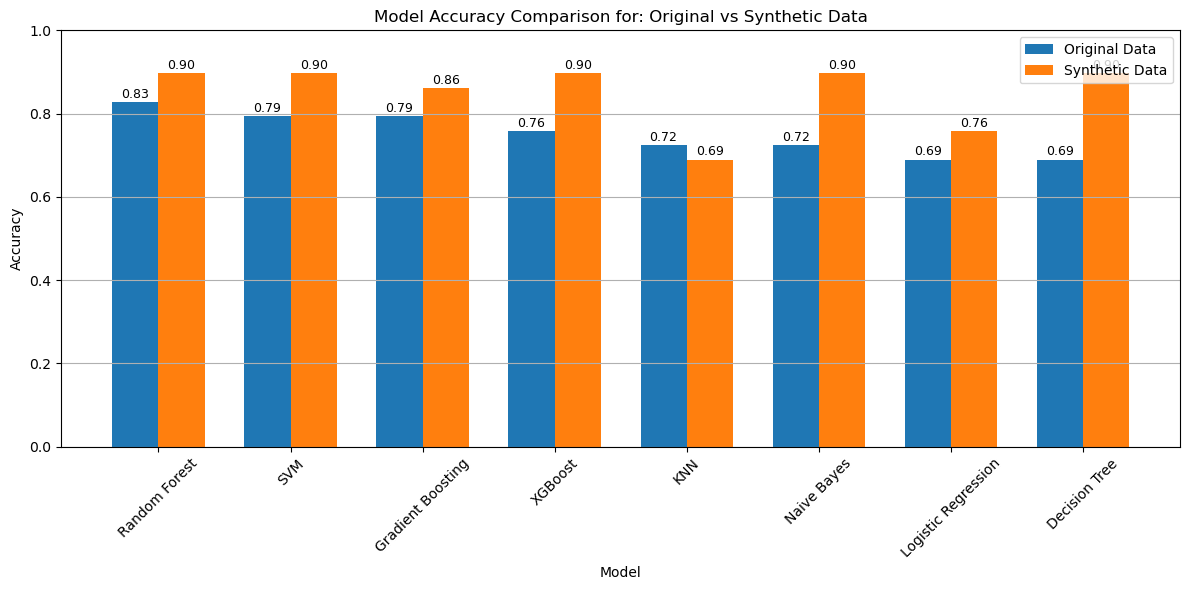

In [287]:
# == ORIGINAL vs SYNTHETIC Comparative Bar Plot ==
comparison_df = pd.DataFrame({
    'Original Data': pd.Series(original_results),
    'Synthetic Data': pd.Series(synthetic_results)
}).reset_index().rename(columns={'index': 'Model'})

comparison_df = comparison_df.sort_values(by='Original Data', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(comparison_df['Model']))

plt.bar(x - bar_width/2, comparison_df['Original Data'], width=bar_width, label='Original Data')
plt.bar(x + bar_width/2, comparison_df['Synthetic Data'], width=bar_width, label='Synthetic Data')

# Add value labels
for i in range(len(x)):
    plt.text(x[i] - bar_width/2, comparison_df['Original Data'].iloc[i] + 0.01,
             f"{comparison_df['Original Data'].iloc[i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i] + bar_width/2, comparison_df['Synthetic Data'].iloc[i] + 0.01,
             f"{comparison_df['Synthetic Data'].iloc[i]:.2f}", ha='center', fontsize=9)

plt.xticks(ticks=x, labels=comparison_df['Model'], rotation=45)
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison for: Original vs Synthetic Data')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# 6. Uniform Sampling


=== Random Forest ===
Accuracy: 0.2759

Classification Report:
              precision    recall  f1-score   support

        High       0.08      0.11      0.10         9
         Low       0.31      0.44      0.36         9
      Medium       0.75      0.27      0.40        11

    accuracy                           0.28        29
   macro avg       0.38      0.28      0.29        29
weighted avg       0.41      0.28      0.29        29

Confusion Matrix:
[[1 7 1]
 [5 4 0]
 [6 2 3]]

=== Logistic Regression ===
Accuracy: 0.3448

Classification Report:
              precision    recall  f1-score   support

        High       0.38      0.67      0.48         9
         Low       0.33      0.44      0.38         9
      Medium       0.00      0.00      0.00        11

    accuracy                           0.34        29
   macro avg       0.24      0.37      0.29        29
weighted avg       0.22      0.34      0.27        29

Confusion Matrix:
[[6 3 0]
 [4 4 1]
 [6 5 0]]

=== Decisio

C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Accuracy: 0.2759

Classification Report:
              precision    recall  f1-score   support

        High       0.23      0.33      0.27         9
         Low       0.29      0.22      0.25         9
      Medium       0.33      0.27      0.30        11

    accuracy                           0.28        29
   macro avg       0.28      0.28      0.27        29
weighted avg       0.29      0.28      0.28        29

Confusion Matrix:
[[3 2 4]
 [5 2 2]
 [5 3 3]]

=== Naive Bayes ===
Accuracy: 0.3448

Classification Report:
              precision    recall  f1-score   support

        High       0.38      0.56      0.45         9
         Low       0.29      0.44      0.35         9
      Medium       0.50      0.09      0.15        11

    accuracy                           0.34        29
   macro avg       0.39      0.36      0.32        29
weighted avg       0.40      0.34      0.31        29

Confusion Matrix:
[[5 4 0]
 [4 4 1]
 [4 6 1]]

=== XGBoost ===
Accuracy: 0.3793

Classifi

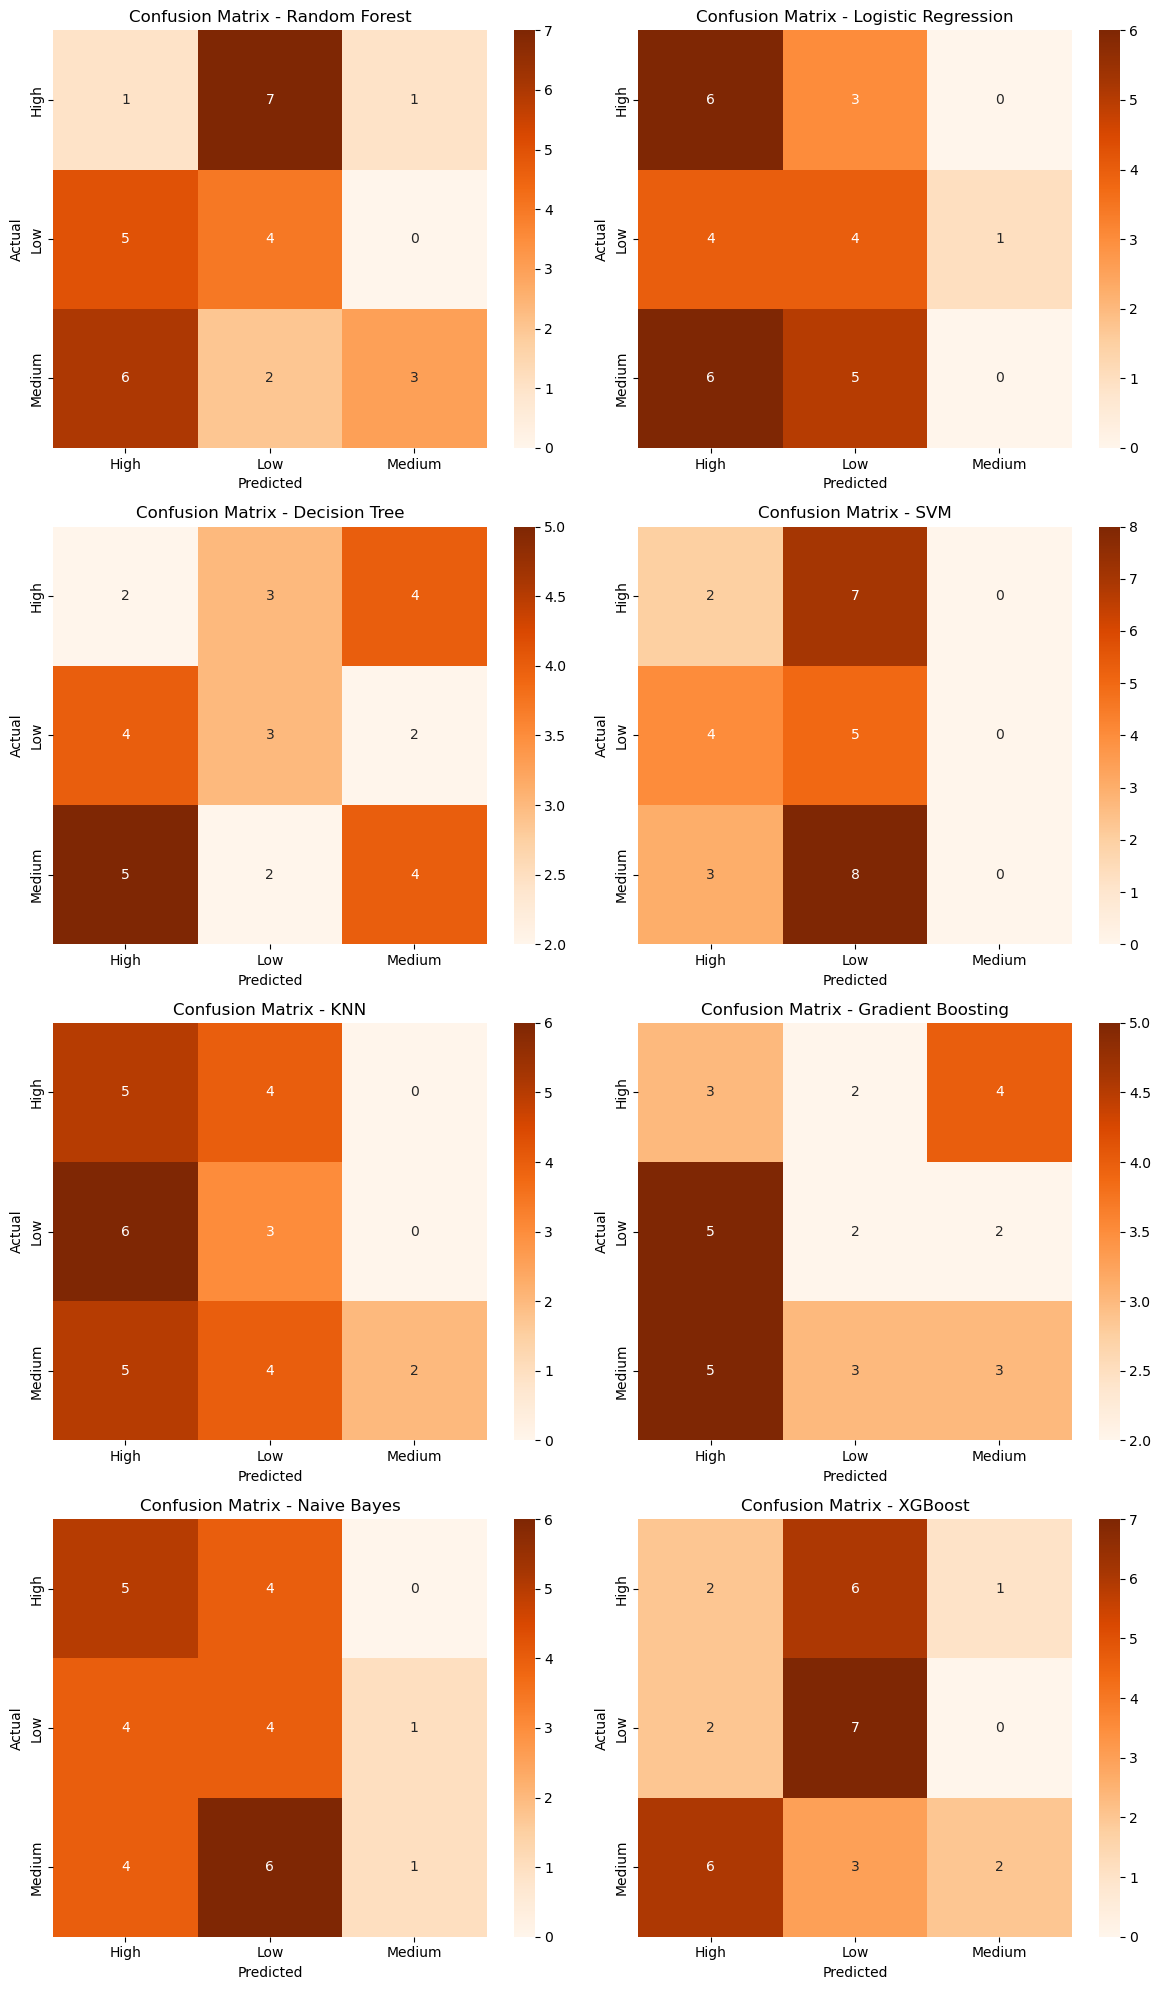


Overall Model Accuracies on Synthetic Data:
Random Forest: 0.2759
Logistic Regression: 0.3448
Decision Tree: 0.3103
SVM: 0.2414
KNN: 0.3448
Gradient Boosting: 0.2759
Naive Bayes: 0.3448
XGBoost: 0.3793


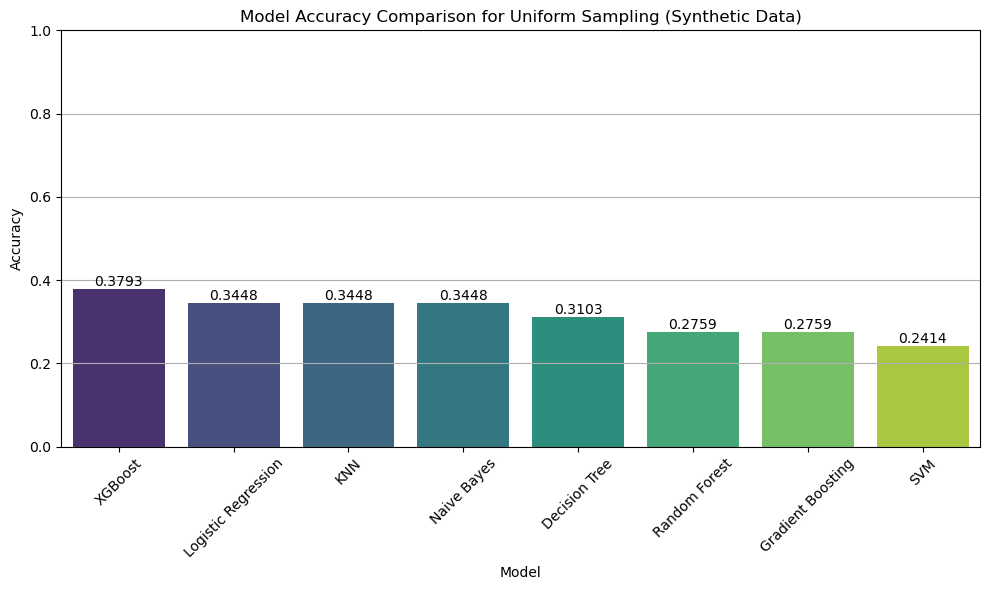

In [288]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Load synthetic dataset
df = pd.read_csv("synthetic_uniform.csv")

# Select features
factors = [
    'Ladder score',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

df_selected = df[factors + ['Country name']].copy()
df_selected.columns = [col.strip().replace(" ", "_").replace(":", "") for col in df_selected.columns]

# Create target variable
df_selected['Happiness_Level'] = pd.cut(
    df_selected['Ladder_score'],
    bins=[0, 4.5, 6, 10],
    labels=['Low', 'Medium', 'High']
)

# Features and target
X = df_selected.drop(columns=['Country_name', 'Ladder_score', 'Happiness_Level'])
y = df_selected['Happiness_Level']

# Fill missing
X = X.fillna(X.mean(numeric_only=True))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Store results
synthetic_results = {}
confusion_matrices = {}

# Train and evaluate
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    synthetic_results[name] = acc
    print(f"Accuracy: {acc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    print("Confusion Matrix:")
    print(cm)

# Plot confusion matrices
n_models = len(models)
cols = 2
rows = int(np.ceil(n_models / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()

for idx, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges",
                xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print and visualize accuracies
print("\nOverall Model Accuracies on Synthetic Data:")
for model_name, accuracy in synthetic_results.items():
    print(f"{model_name}: {accuracy:.4f}")

# Accuracy comparison chart
accuracy_df = pd.DataFrame(list(synthetic_results.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison for Uniform Sampling (Synthetic Data)")
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

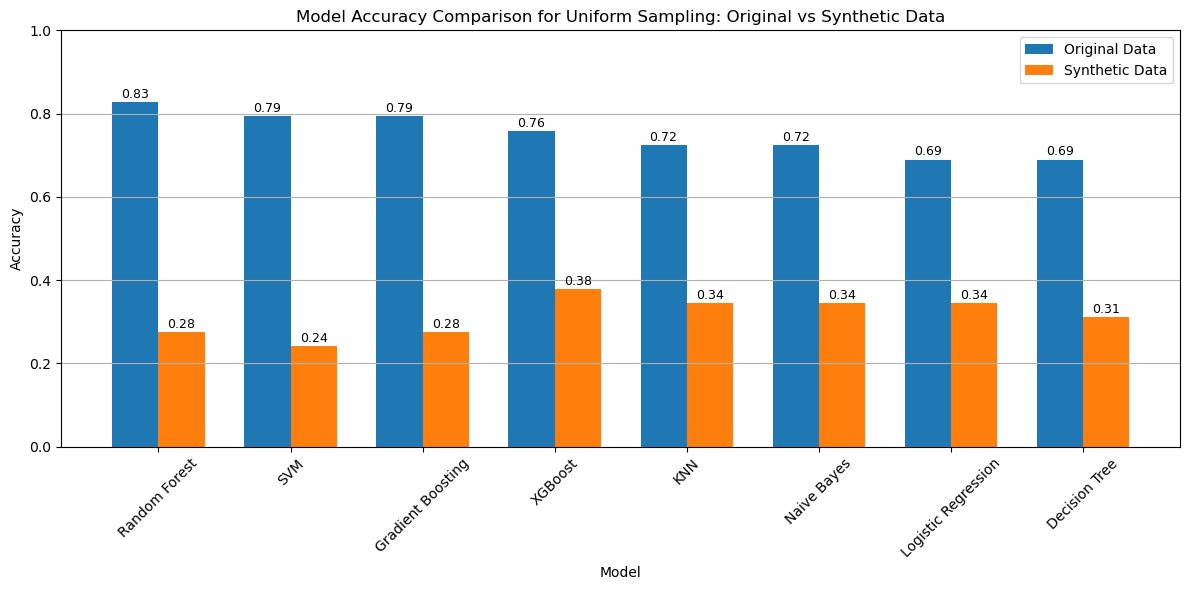

In [289]:
# == ORIGINAL vs SYNTHETIC Comparative Bar Plot ==
comparison_df = pd.DataFrame({
    'Original Data': pd.Series(original_results),
    'Synthetic Data': pd.Series(synthetic_results)
}).reset_index().rename(columns={'index': 'Model'})

comparison_df = comparison_df.sort_values(by='Original Data', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(comparison_df['Model']))

plt.bar(x - bar_width/2, comparison_df['Original Data'], width=bar_width, label='Original Data')
plt.bar(x + bar_width/2, comparison_df['Synthetic Data'], width=bar_width, label='Synthetic Data')

# Add value labels
for i in range(len(x)):
    plt.text(x[i] - bar_width/2, comparison_df['Original Data'].iloc[i] + 0.01,
             f"{comparison_df['Original Data'].iloc[i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i] + bar_width/2, comparison_df['Synthetic Data'].iloc[i] + 0.01,
             f"{comparison_df['Synthetic Data'].iloc[i]:.2f}", ha='center', fontsize=9)

plt.xticks(ticks=x, labels=comparison_df['Model'], rotation=45)
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison for Uniform Sampling: Original vs Synthetic Data')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# 7. Truncated Normal Sampling


=== Random Forest ===
Accuracy: 0.4483

Classification Report:
              precision    recall  f1-score   support

        High       0.38      0.27      0.32        11
         Low       0.00      0.00      0.00         5
      Medium       0.48      0.77      0.59        13

    accuracy                           0.45        29
   macro avg       0.28      0.35      0.30        29
weighted avg       0.36      0.45      0.38        29

Confusion Matrix:
[[ 3  0  8]
 [ 2  0  3]
 [ 3  0 10]]

=== Logistic Regression ===
Accuracy: 0.4828

Classification Report:
              precision    recall  f1-score   support

        High       0.40      0.36      0.38        11
         Low       0.00      0.00      0.00         5
      Medium       0.53      0.77      0.62        13

    accuracy                           0.48        29
   macro avg       0.31      0.38      0.34        29
weighted avg       0.39      0.48      0.42        29

Confusion Matrix:
[[ 4  0  7]
 [ 3  0  2]
 [ 3  0

C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Accuracy: 0.4483

Classification Report:
              precision    recall  f1-score   support

        High       0.50      0.27      0.35        11
         Low       0.29      0.40      0.33         5
      Medium       0.50      0.62      0.55        13

    accuracy                           0.45        29
   macro avg       0.43      0.43      0.41        29
weighted avg       0.46      0.45      0.44        29

Confusion Matrix:
[[3 2 6]
 [1 2 2]
 [2 3 8]]

=== Naive Bayes ===
Accuracy: 0.3793

Classification Report:
              precision    recall  f1-score   support

        High       0.22      0.18      0.20        11
         Low       0.00      0.00      0.00         5
      Medium       0.45      0.69      0.55        13

    accuracy                           0.38        29
   macro avg       0.22      0.29      0.25        29
weighted avg       0.29      0.38      0.32        29

Confusion Matrix:
[[2 0 9]
 [3 0 2]
 [4 0 9]]

=== XGBoost ===


C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ÇELİK\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Accuracy: 0.4138

Classification Report:
              precision    recall  f1-score   support

        High       0.43      0.27      0.33        11
         Low       0.25      0.20      0.22         5
      Medium       0.44      0.62      0.52        13

    accuracy                           0.41        29
   macro avg       0.37      0.36      0.36        29
weighted avg       0.40      0.41      0.40        29

Confusion Matrix:
[[3 1 7]
 [1 1 3]
 [3 2 8]]


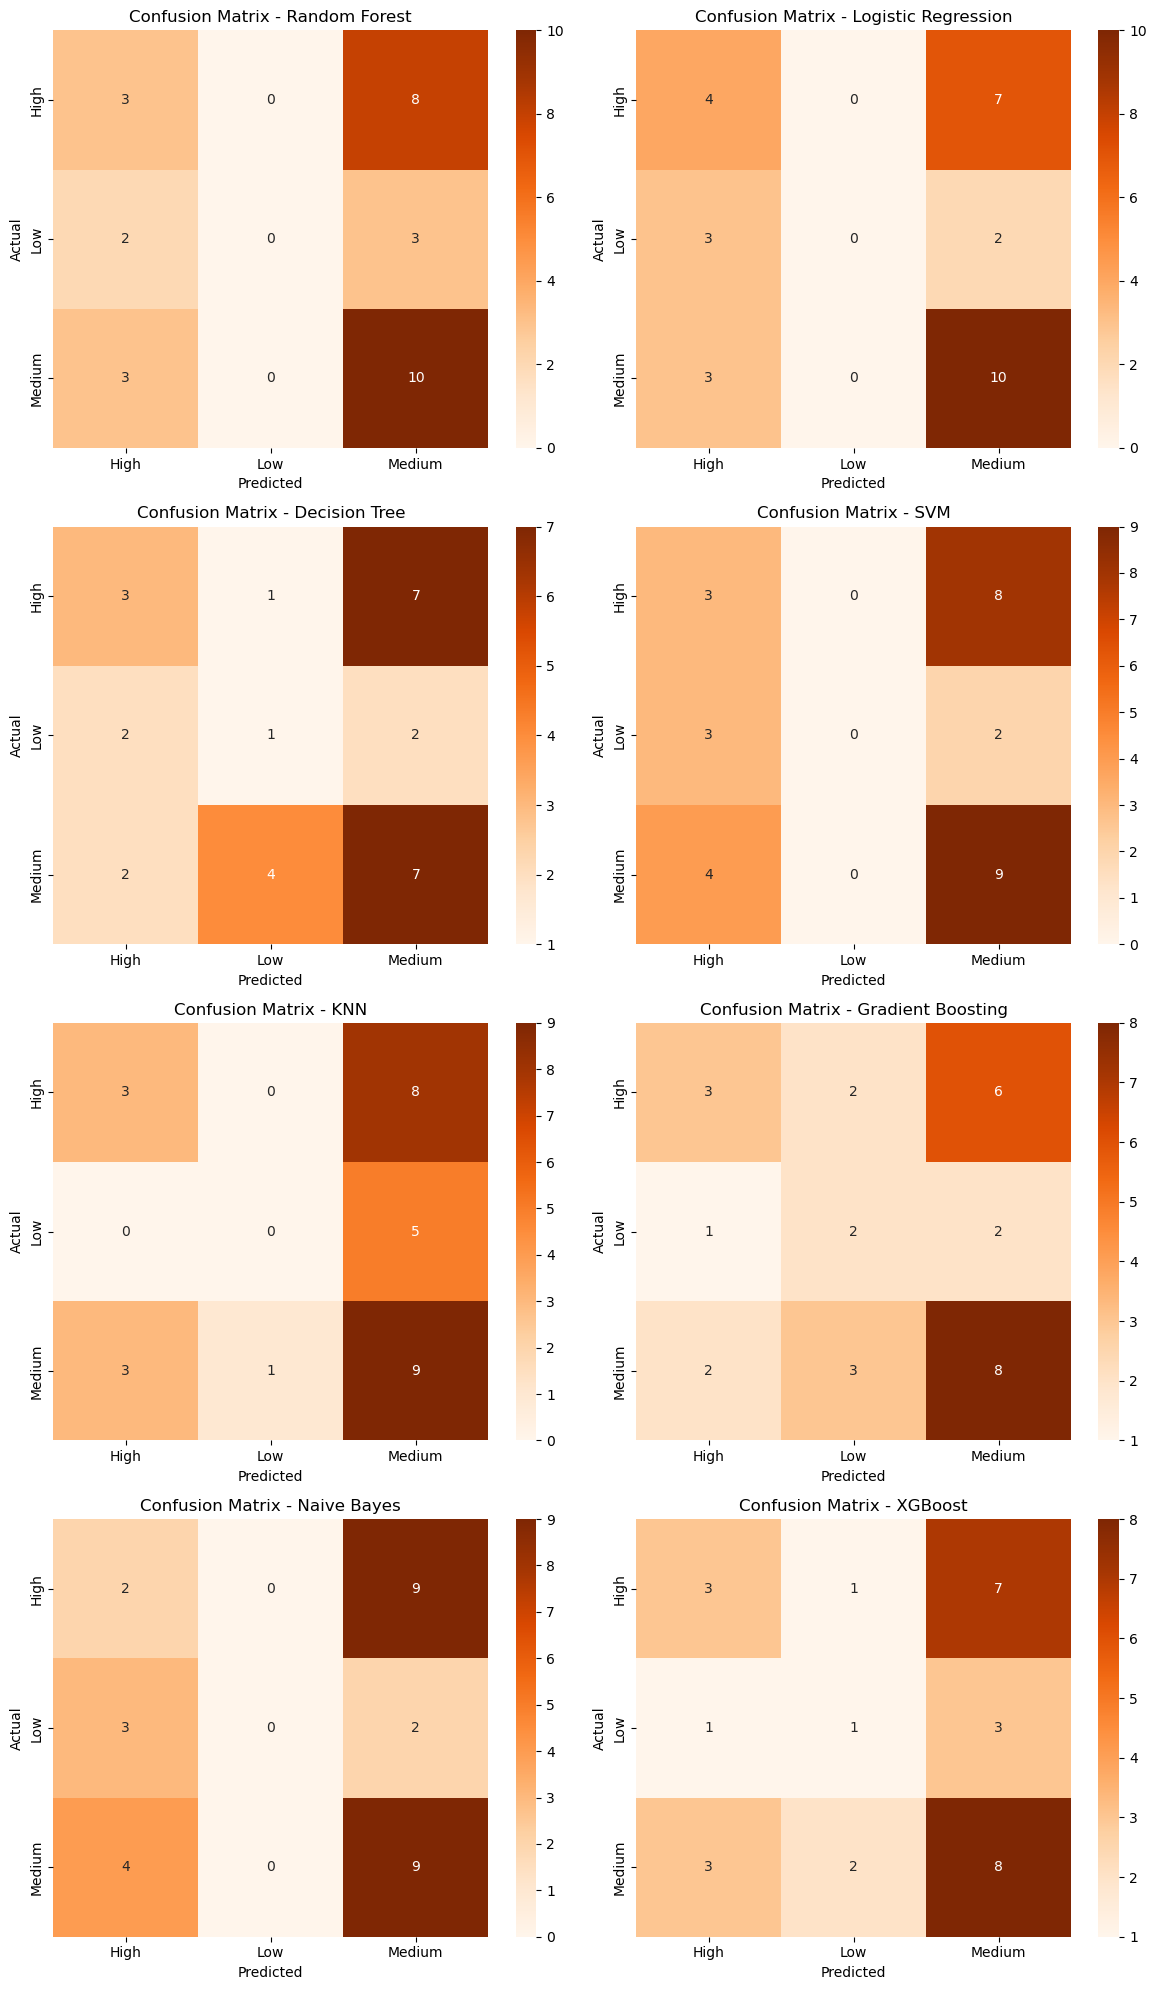


Overall Model Accuracies on Synthetic Data:
Random Forest: 0.4483
Logistic Regression: 0.4828
Decision Tree: 0.3793
SVM: 0.4138
KNN: 0.4138
Gradient Boosting: 0.4483
Naive Bayes: 0.3793
XGBoost: 0.4138


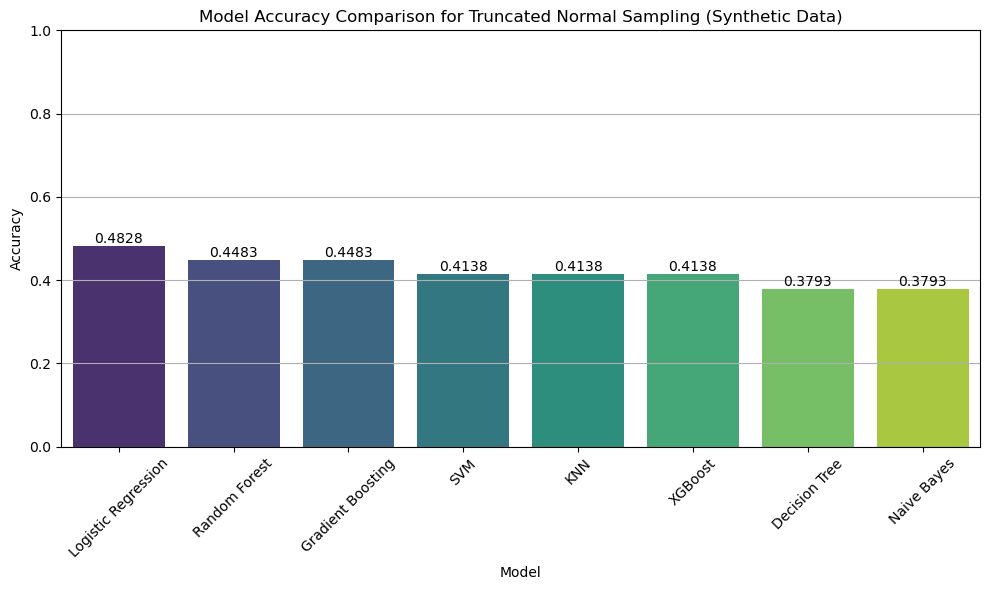

In [290]:
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Load synthetic dataset
df = pd.read_csv("synthetic_truncnorm.csv")

# Select features
factors = [
    'Ladder score',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

df_selected = df[factors + ['Country name']].copy()
df_selected.columns = [col.strip().replace(" ", "_").replace(":", "") for col in df_selected.columns]

# Create target variable
df_selected['Happiness_Level'] = pd.cut(
    df_selected['Ladder_score'],
    bins=[0, 4.5, 6, 10],
    labels=['Low', 'Medium', 'High']
)

# Features and target
X = df_selected.drop(columns=['Country_name', 'Ladder_score', 'Happiness_Level'])
y = df_selected['Happiness_Level']

# Fill missing
X = X.fillna(X.mean(numeric_only=True))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Store results
synthetic_results = {}
confusion_matrices = {}

# Train and evaluate
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    synthetic_results[name] = acc
    print(f"Accuracy: {acc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    print("Confusion Matrix:")
    print(cm)

# Plot confusion matrices
n_models = len(models)
cols = 2
rows = int(np.ceil(n_models / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
axes = axes.flatten()

for idx, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges",
                xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print and visualize accuracies
print("\nOverall Model Accuracies on Synthetic Data:")
for model_name, accuracy in synthetic_results.items():
    print(f"{model_name}: {accuracy:.4f}")

# Accuracy comparison chart
accuracy_df = pd.DataFrame(list(synthetic_results.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=accuracy_df, x='Model', y='Accuracy', palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison for Truncated Normal Sampling (Synthetic Data)")
plt.ylim(0, 1)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

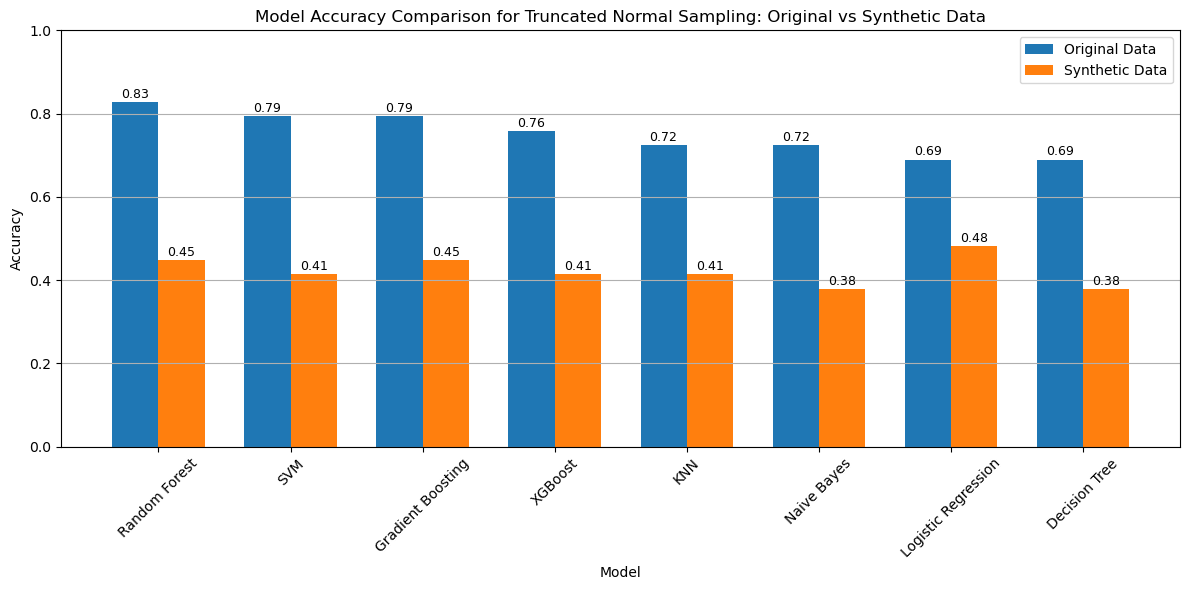

In [291]:
# == ORIGINAL vs SYNTHETIC Comparative Bar Plot ==
comparison_df = pd.DataFrame({
    'Original Data': pd.Series(original_results),
    'Synthetic Data': pd.Series(synthetic_results)
}).reset_index().rename(columns={'index': 'Model'})

comparison_df = comparison_df.sort_values(by='Original Data', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(comparison_df['Model']))

plt.bar(x - bar_width/2, comparison_df['Original Data'], width=bar_width, label='Original Data')
plt.bar(x + bar_width/2, comparison_df['Synthetic Data'], width=bar_width, label='Synthetic Data')

# Add value labels
for i in range(len(x)):
    plt.text(x[i] - bar_width/2, comparison_df['Original Data'].iloc[i] + 0.01,
             f"{comparison_df['Original Data'].iloc[i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i] + bar_width/2, comparison_df['Synthetic Data'].iloc[i] + 0.01,
             f"{comparison_df['Synthetic Data'].iloc[i]:.2f}", ha='center', fontsize=9)

plt.xticks(ticks=x, labels=comparison_df['Model'], rotation=45)
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison for Truncated Normal Sampling: Original vs Synthetic Data')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()